# Démarche de travail

## Définir un objectif mesurable

## EDA (Exploratory Data Analysis)

### Conclusion initiales

## Pre-processing

## Modelling

# Application

## EDA 

### Analyse de la forme

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('data.csv')

In [12]:
data.head()

id  rpm  motor_power     torque  outlet_pressure_bar    air_flow  \
0   1  499  1405.842858  27.511708                1.000  308.289879   
1   2  513  1457.370092  31.030115                1.081  307.833736   
2   3  495  1582.249959  33.484653                1.369  307.377593   
3   4  480  1712.466820  36.394475                1.691  306.975248   
4   5  498  1766.035170  38.249154                1.731  306.832132   

    noise_db  outlet_temp  wpump_outlet_press  water_inlet_temp  ...  \
0  40.840517    78.554715            2.960632         43.166392  ...   
1  40.484226    76.902822            2.536711         47.342143  ...   
2  40.918572    77.547021            2.112789         49.306593  ...   
3  40.450953    80.059949            2.087534         46.886933  ...   
4  41.233739    79.130424            2.338877         50.498100  ...   

      gaccy     gaccz     haccx     haccy     haccz  bearings  wpump  \
0  0.383773  2.649801  1.213344  1.409218  2.962484        Ok     Ok   
1  0.450954  2.669423  1.210674  1.379050  2.938135        Ok     Ok   
2  0.443924  2.772009  1.210612  1.373490  2.991878        Ok     Ok   
3  0.370457  2.876056  1.213223  1.443234  3.096158        Ok     Ok   
4  0.383868  2.849451  1.209216  1.405190  3.059417        Ok     Ok   

   radiator  exvalve  acmotor  
0     Clean    Clean   Stable  
1     Clean    Clean   Stable  
2     Clean    Clean   Stable  
3     Clean    Clean   Stable  
4     Clean    Clean   Stable  

[5 rows x 26 columns]

In [13]:
df1 = data.copy()

In [14]:
df1.shape

(1000, 26)

In [15]:
df1.dtypes.value_counts()

float64    19
object      5
int64       2
Name: count, dtype: int64

<Axes: >

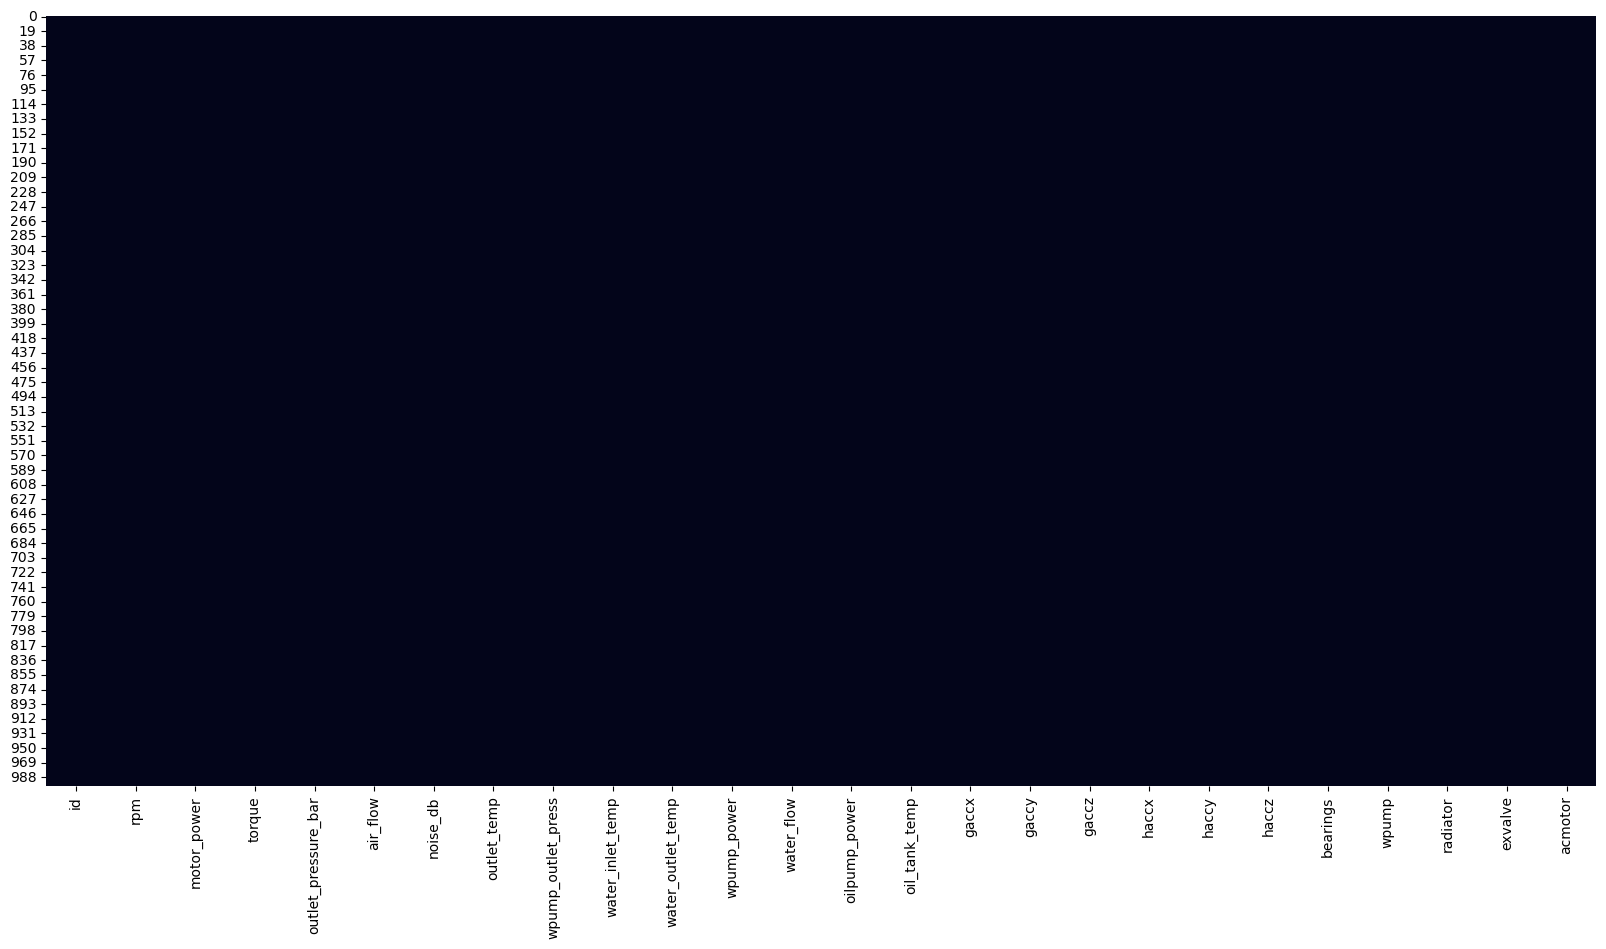

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(), cbar=False)

In [17]:
(df1.isna().sum()/df1.shape[0]).sort_values()

id                     0.0
radiator               0.0
wpump                  0.0
bearings               0.0
haccz                  0.0
haccy                  0.0
haccx                  0.0
gaccz                  0.0
gaccy                  0.0
gaccx                  0.0
oil_tank_temp          0.0
oilpump_power          0.0
water_flow             0.0
wpump_power            0.0
water_outlet_temp      0.0
water_inlet_temp       0.0
wpump_outlet_press     0.0
outlet_temp            0.0
noise_db               0.0
air_flow               0.0
outlet_pressure_bar    0.0
torque                 0.0
motor_power            0.0
rpm                    0.0
exvalve                0.0
acmotor                0.0
dtype: float64

In [18]:
# Créer une fonction pour attribuer un diagnostic clair à chaque ligne
def assign_diagnostic(row):
    if row['bearings'] == 'Noisy':
        return 'Roulement bruyant'
    elif row['wpump'] == 'Noisy':
        return 'Pompe à eau bruyante'
    elif row['radiator'] == 'Dirty':
        return 'Radiateur encrassé'
    elif row['exvalve'] == 'Dirty':
        return 'Valve encrassée'
    else:
        return 'Sans problème'

# Appliquer la fonction à chaque ligne
df1['diagnostic'] = df1.apply(assign_diagnostic, axis=1)

# Afficher un aperçu du résultat
df1[['rpm', 'diagnostic']].head()


rpm     diagnostic
0  499  Sans problème
1  513  Sans problème
2  495  Sans problème
3  480  Sans problème
4  498  Sans problème

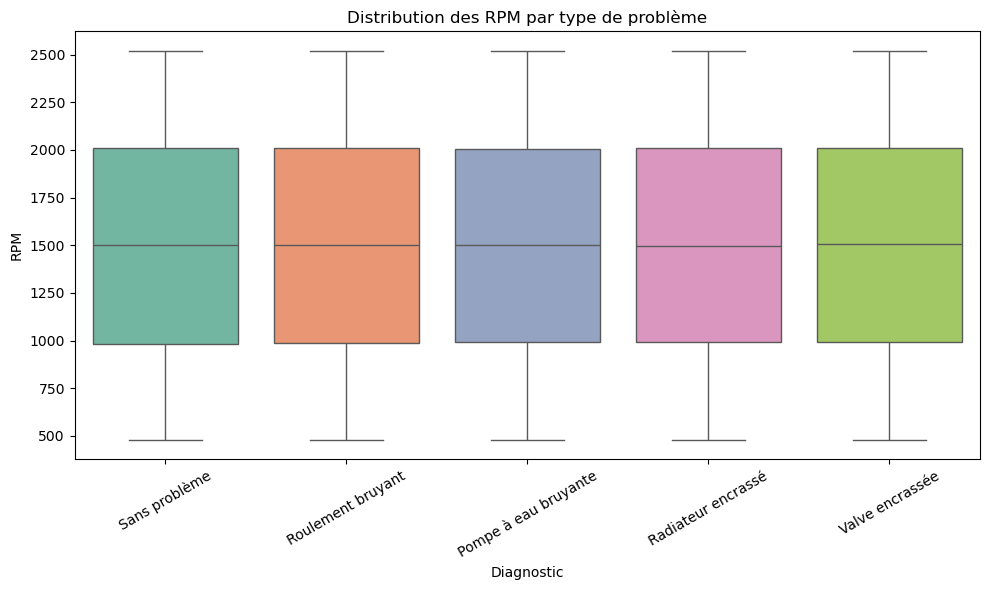

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='diagnostic', y='rpm', palette='Set2', hue='diagnostic')
plt.xticks(rotation=30)
plt.title("Distribution des RPM par type de problème")
plt.xlabel("Diagnostic")
plt.ylabel("RPM")
plt.tight_layout()
plt.show()

### Analyse de fond

#### Examen des colonnes target

In [35]:
df1['acmotor'].value_counts(normalize=True)

acmotor
Stable    1.0
Name: proportion, dtype: float64

In [37]:
df1['bearings'].value_counts(normalize=True)

bearings
Ok       0.8
Noisy    0.2
Name: proportion, dtype: float64

In [39]:
df1['wpump'].value_counts(normalize=True)

wpump
Ok       0.8
Noisy    0.2
Name: proportion, dtype: float64

In [41]:
df1['radiator'].value_counts(normalize=True)

radiator
Clean    0.8
Dirty    0.2
Name: proportion, dtype: float64

In [43]:
df1['exvalve'].value_counts(normalize=True)

exvalve
Clean    0.8
Dirty    0.2
Name: proportion, dtype: float64

In [45]:
df1 = df1.drop(['acmotor', 'id'], axis=1)

In [47]:
df1.head()

rpm  motor_power     torque  outlet_pressure_bar    air_flow   noise_db  \
0  499  1405.842858  27.511708                1.000  308.289879  40.840517   
1  513  1457.370092  31.030115                1.081  307.833736  40.484226   
2  495  1582.249959  33.484653                1.369  307.377593  40.918572   
3  480  1712.466820  36.394475                1.691  306.975248  40.450953   
4  498  1766.035170  38.249154                1.731  306.832132  41.233739   

   outlet_temp  wpump_outlet_press  water_inlet_temp  water_outlet_temp  ...  \
0    78.554715            2.960632         43.166392          47.259238  ...   
1    76.902822            2.536711         47.342143          55.025653  ...   
2    77.547021            2.112789         49.306593          50.505622  ...   
3    80.059949            2.087534         46.886933          58.706376  ...   
4    79.130424            2.338877         50.498100          54.046362  ...   

      gaccy     gaccz     haccx     haccy     haccz  bearings  wpump  \
0  0.383773  2.649801  1.213344  1.409218  2.962484        Ok     Ok   
1  0.450954  2.669423  1.210674  1.379050  2.938135        Ok     Ok   
2  0.443924  2.772009  1.210612  1.373490  2.991878        Ok     Ok   
3  0.370457  2.876056  1.213223  1.443234  3.096158        Ok     Ok   
4  0.383868  2.849451  1.209216  1.405190  3.059417        Ok     Ok   

   radiator  exvalve     diagnostic  
0     Clean    Clean  Sans problème  
1     Clean    Clean  Sans problème  
2     Clean    Clean  Sans problème  
3     Clean    Clean  Sans problème  
4     Clean    Clean  Sans problème  

[5 rows x 25 columns]

#### Variable quantitative

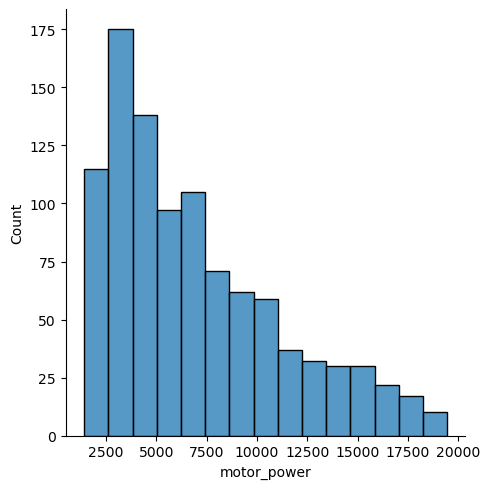

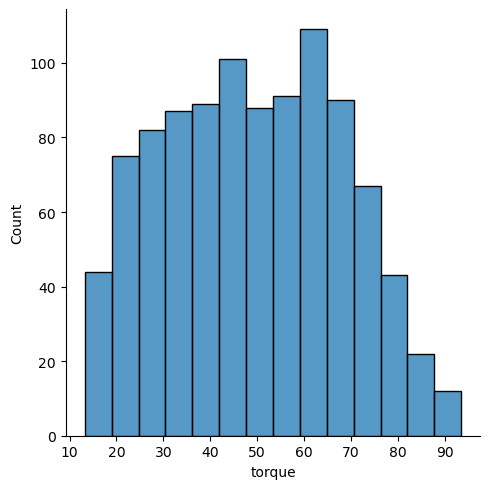

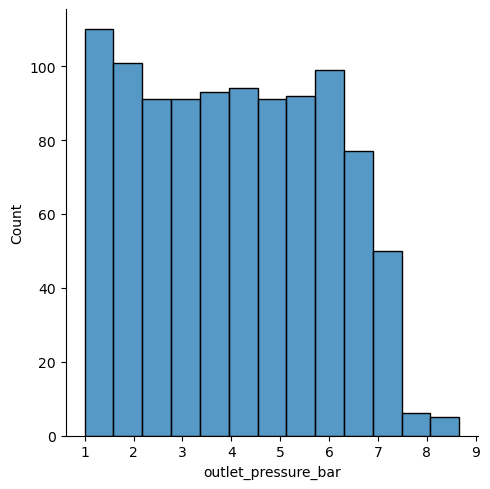

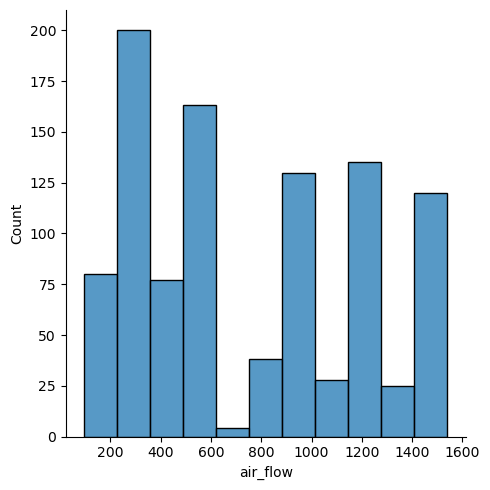

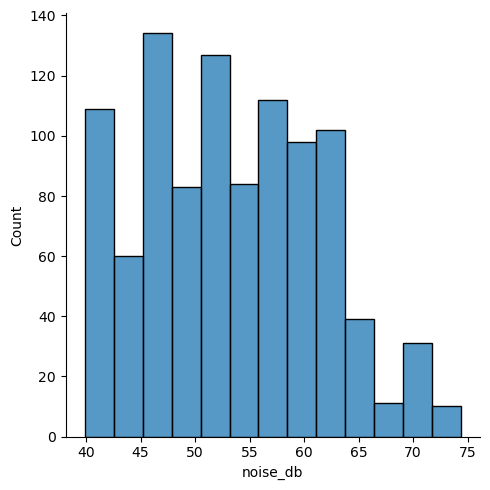

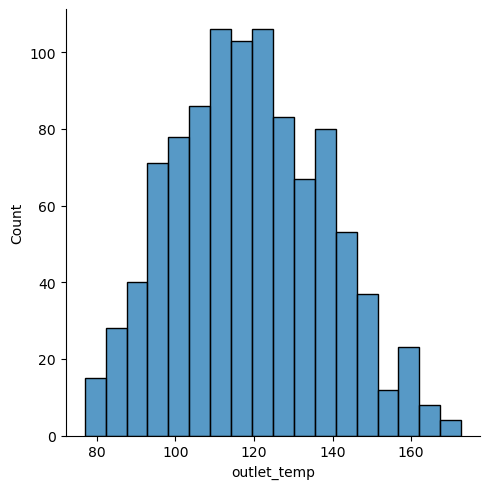

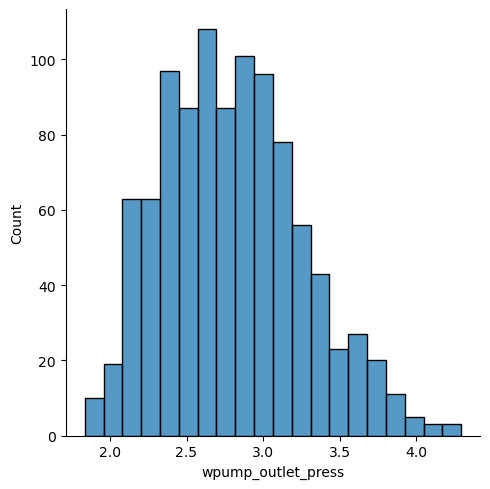

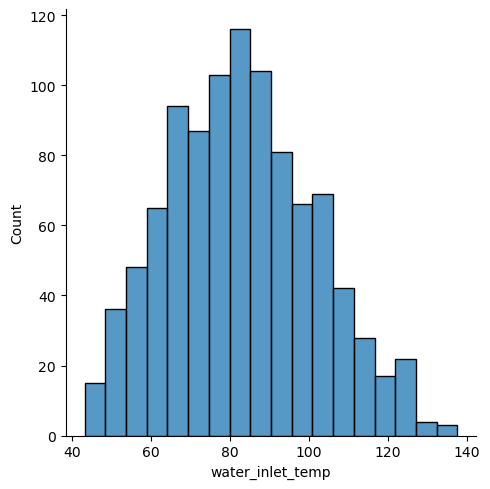

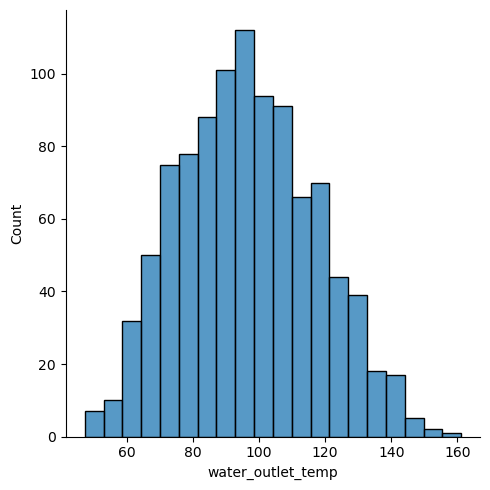

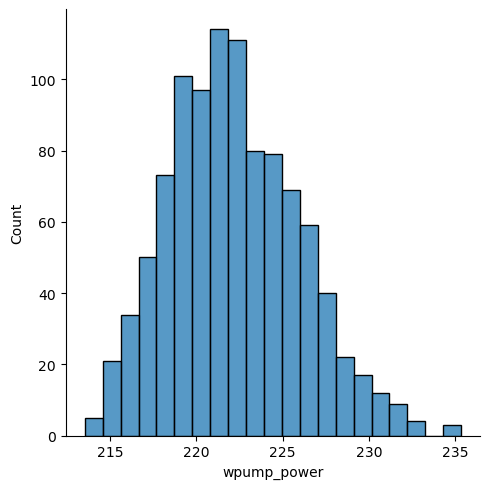

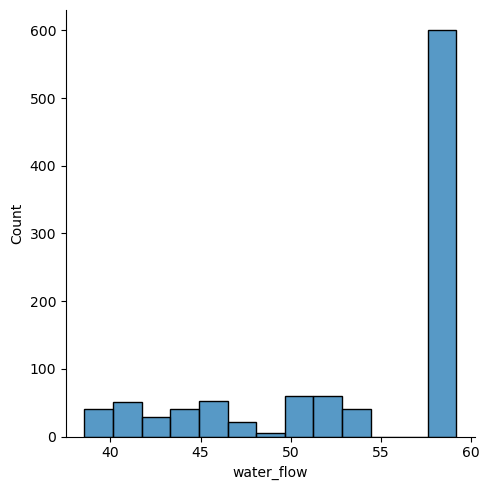

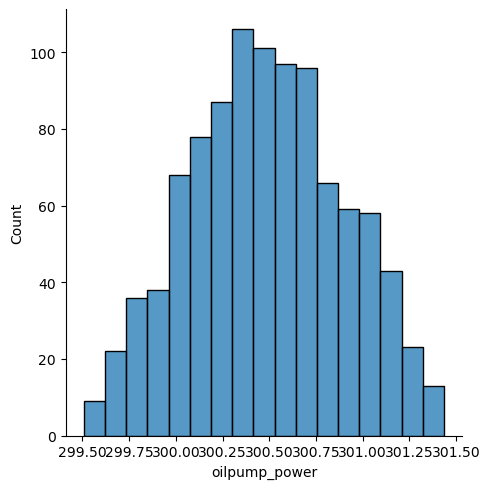

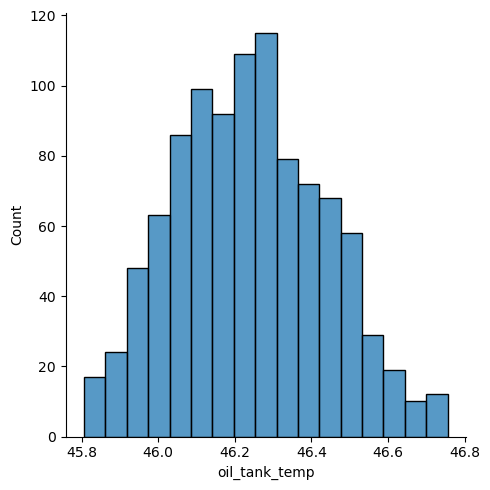

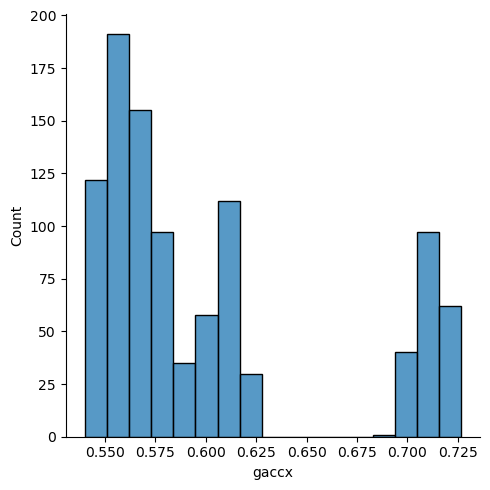

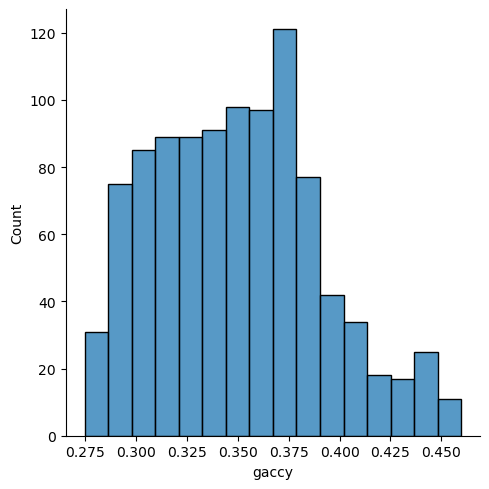

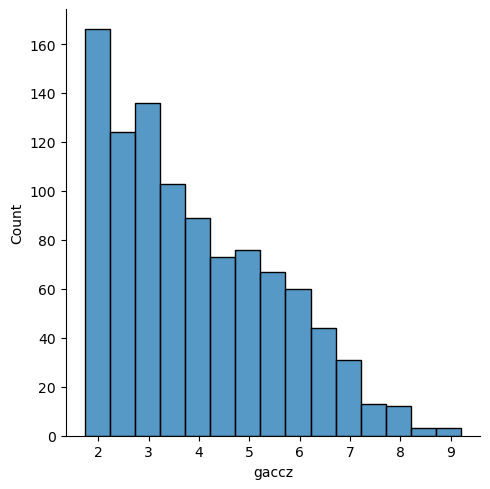

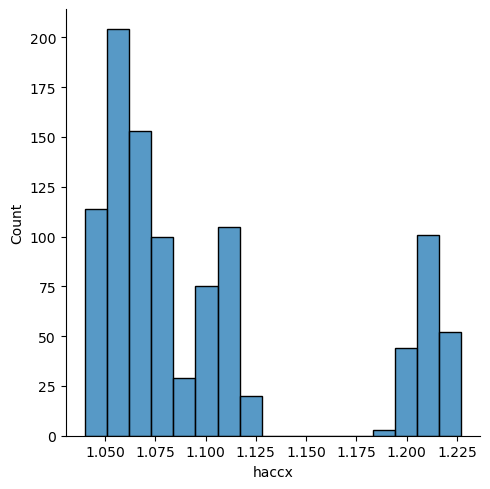

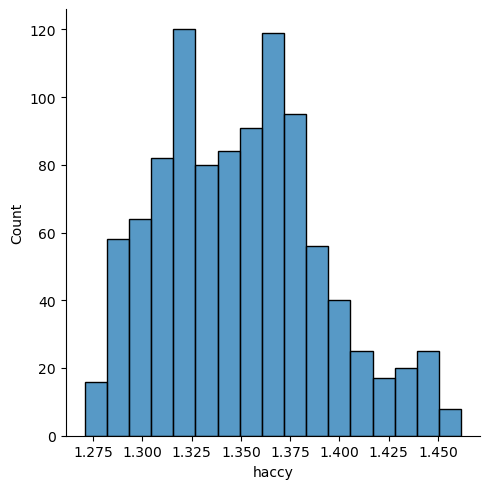

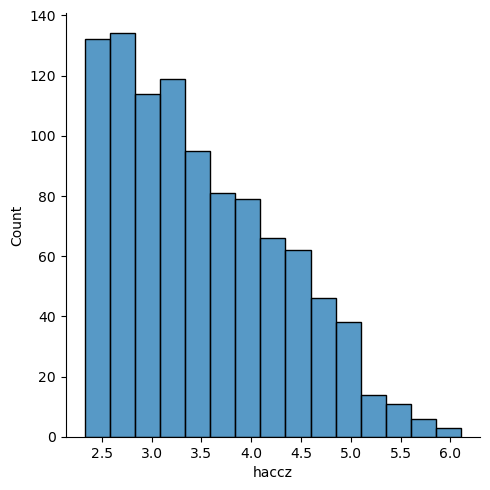

In [50]:
for col in df1.select_dtypes('float'):
    sns.displot(df1[col])

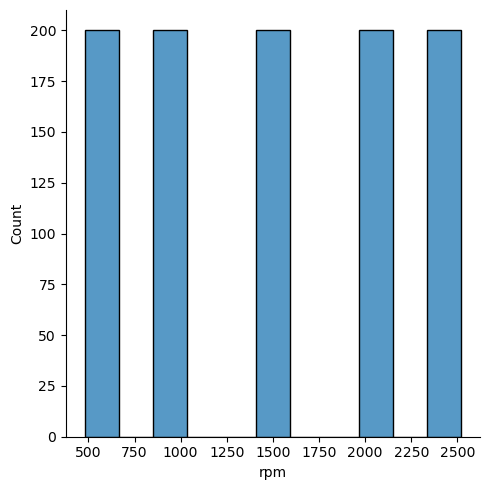

In [51]:
sns.displot(df1['rpm'])

#### Variables qualitatives

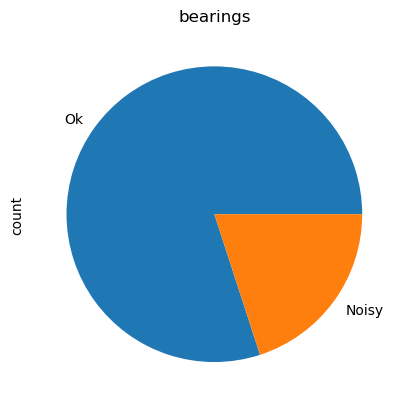

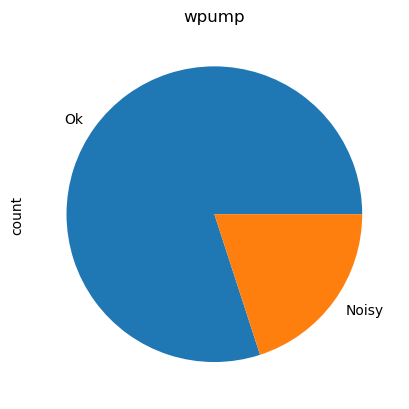

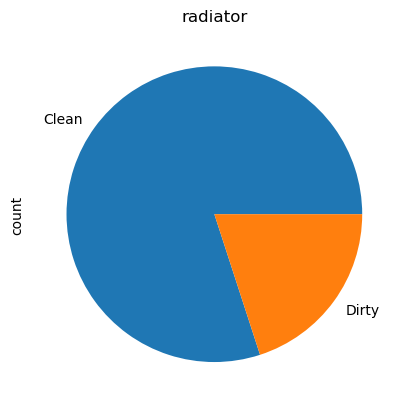

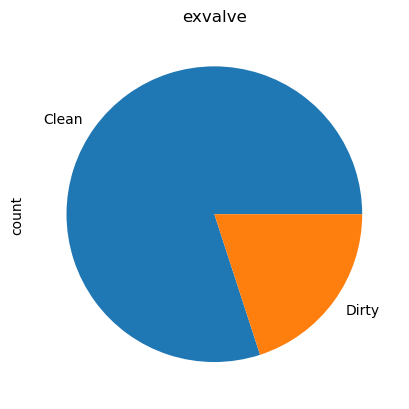

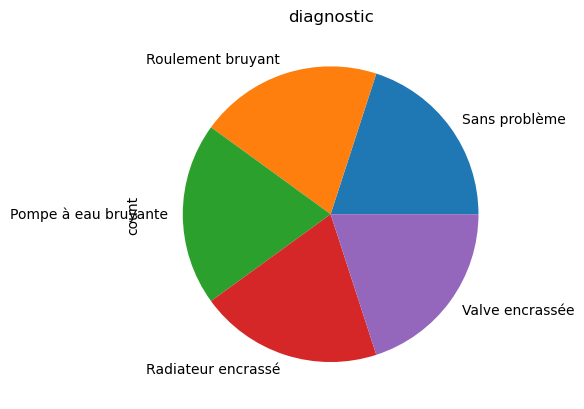

In [53]:
for col in df1.select_dtypes('object'):
    plt.figure()
    df1[col].value_counts().plot.pie()
    plt.title(col)

#### Relation Target/Values

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Appliquer KMeans pour regrouper en 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df1['Machine_Model'] = kmeans.fit_predict(df1[['rpm']])

# Identifier les colonnes numériques à normaliser
num_cols = ['rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow', 'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
            'water_outlet_temp', 'wpump_power','water_flow', 'oilpump_power', 'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx',
           'haccy', 'haccz']  # Adapter selon ton dataset

df1[num_cols] = df1[num_cols].astype(float)

# Standardisation par modèle de machine
scaler = MinMaxScaler()

for model in df1['Machine_Model'].unique():  
    mask = df1['Machine_Model'] == model  # Filtrer les lignes correspondant à ce modèle
    df1.loc[mask, num_cols] = scaler.fit_transform(df1.loc[mask, num_cols])  # Appliquer le MinMaxScaler

C:\Users\quent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [56]:
clean_radiator = df1[df1['radiator'] == 'Clean']
dirty_radiator = df1[df1['radiator'] == 'Dirty']

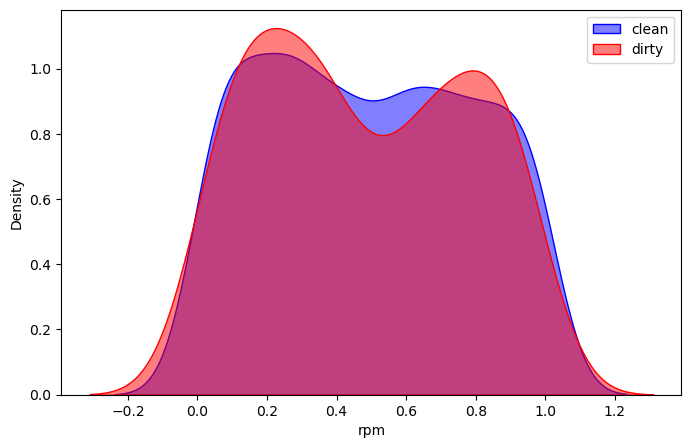

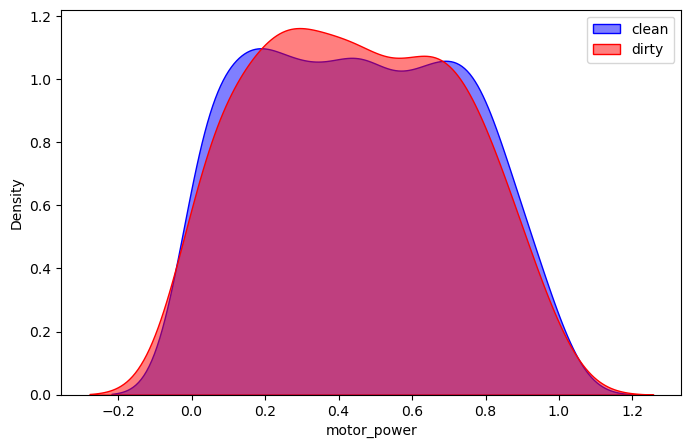

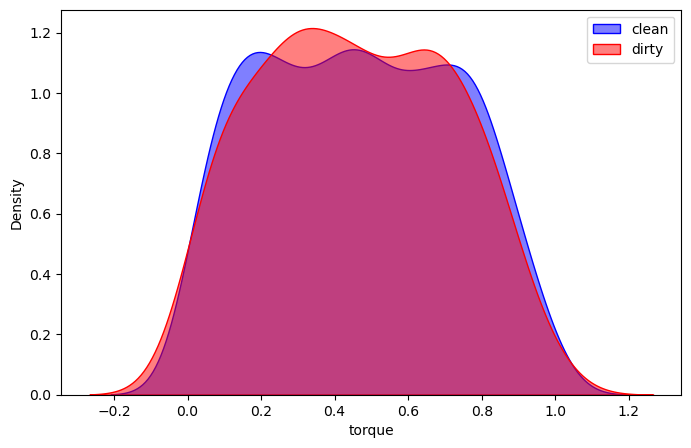

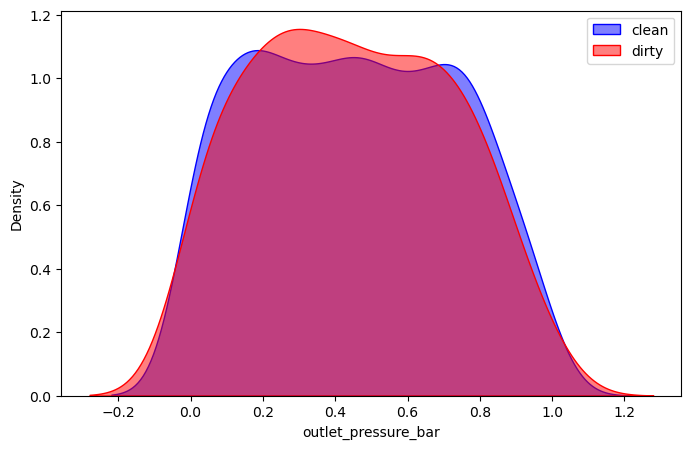

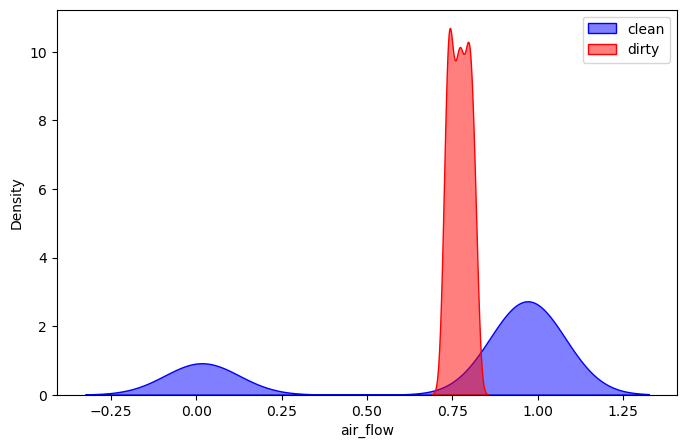

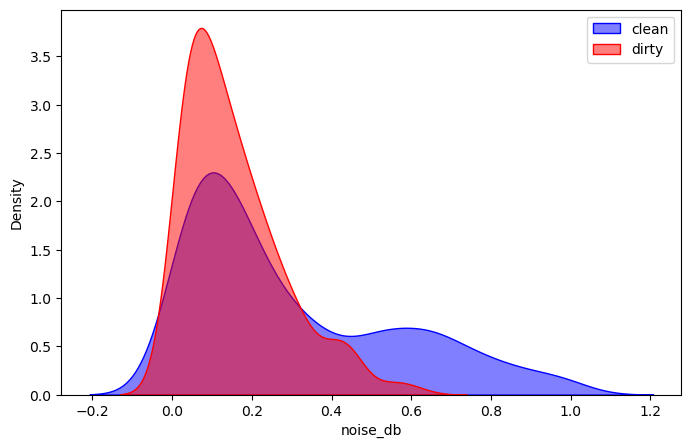

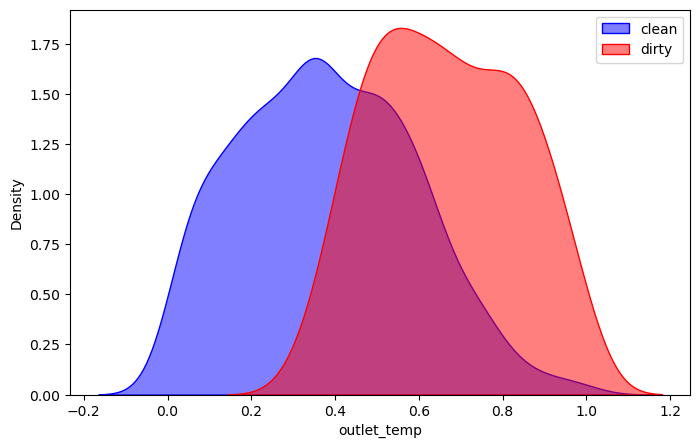

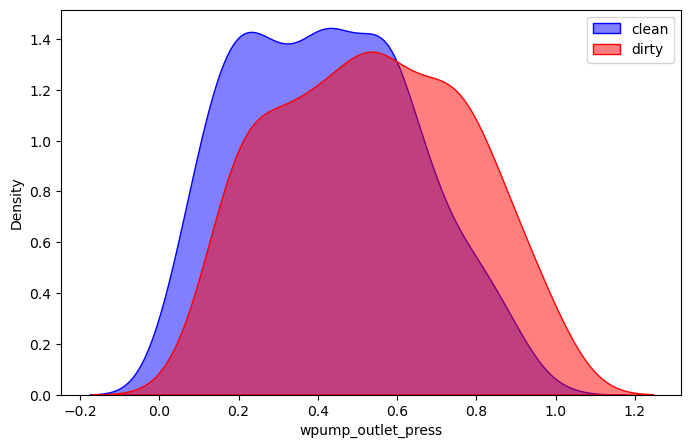

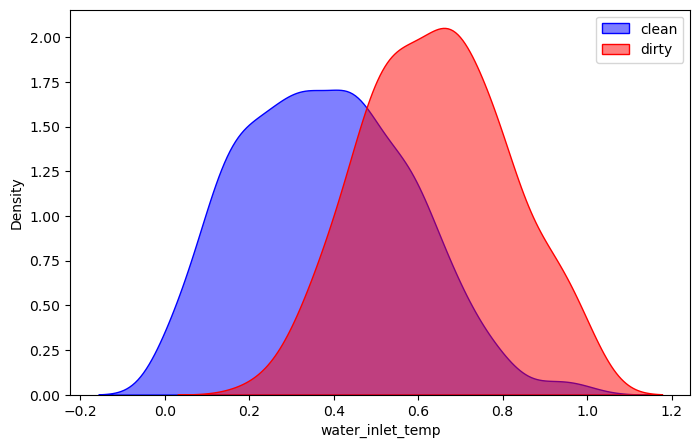

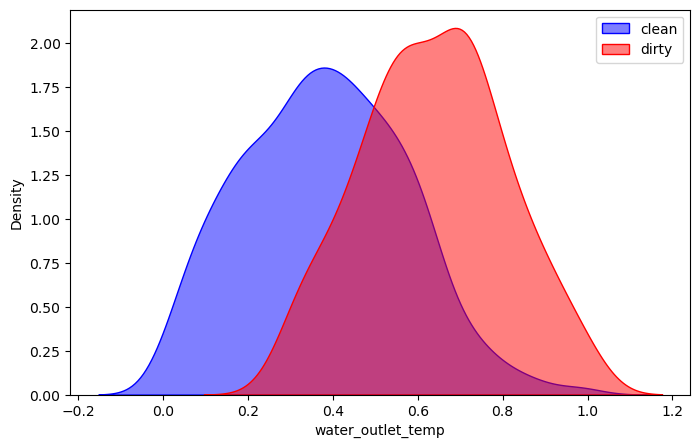

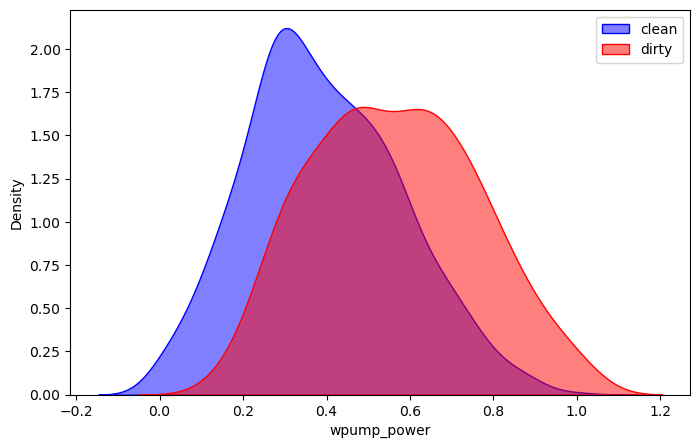

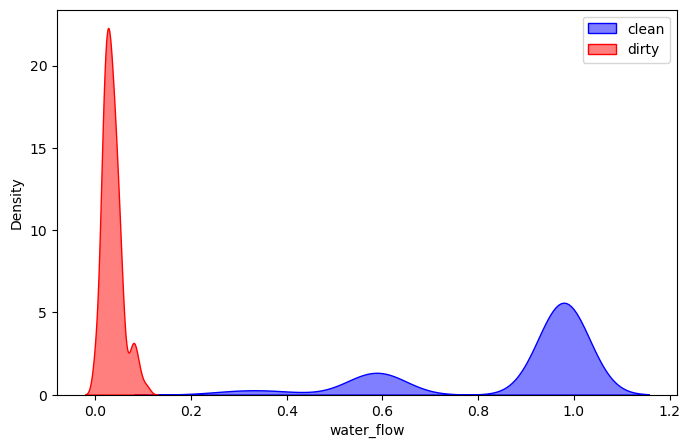

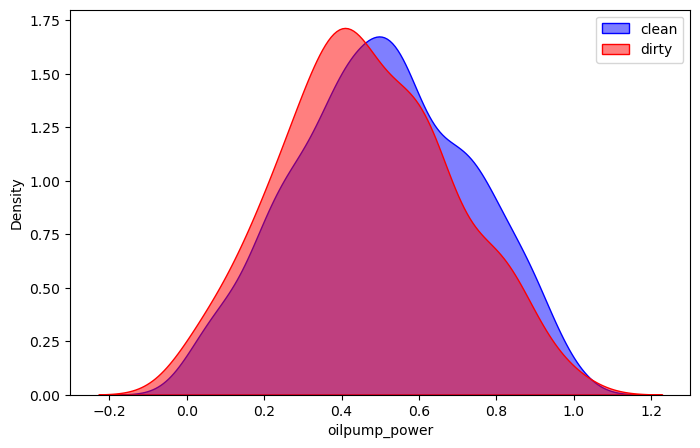

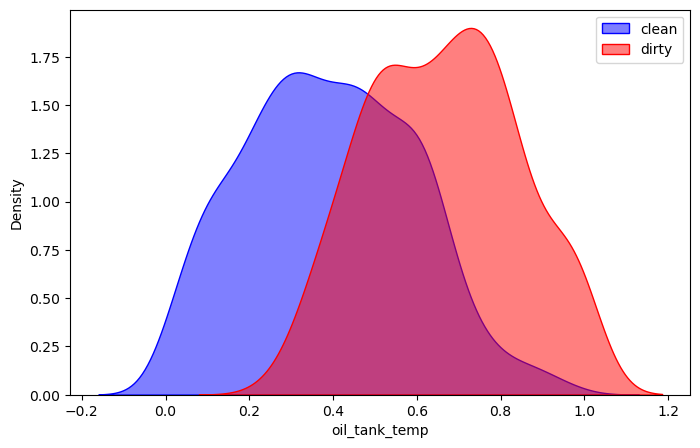

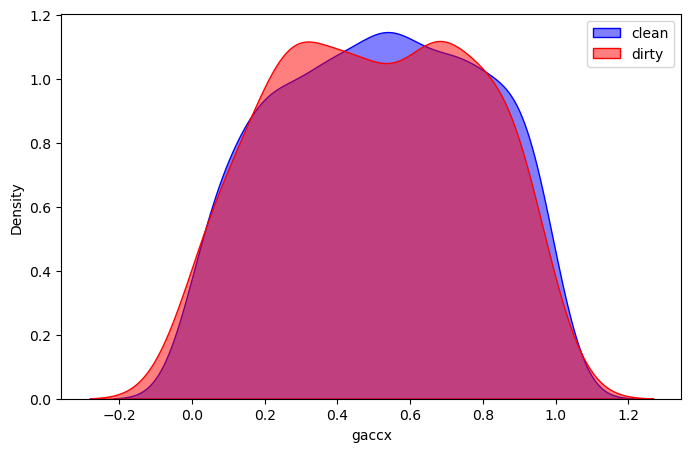

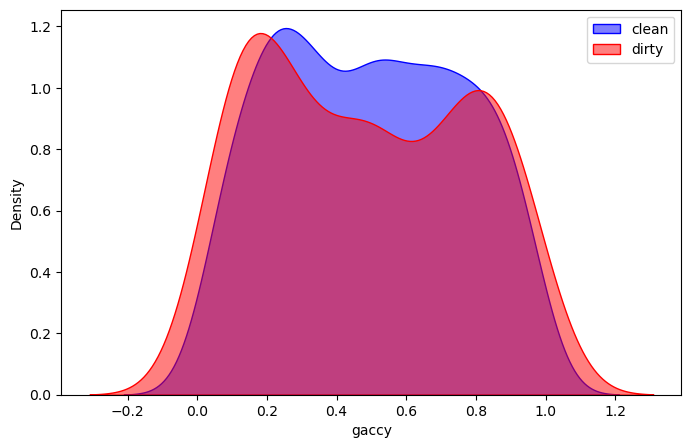

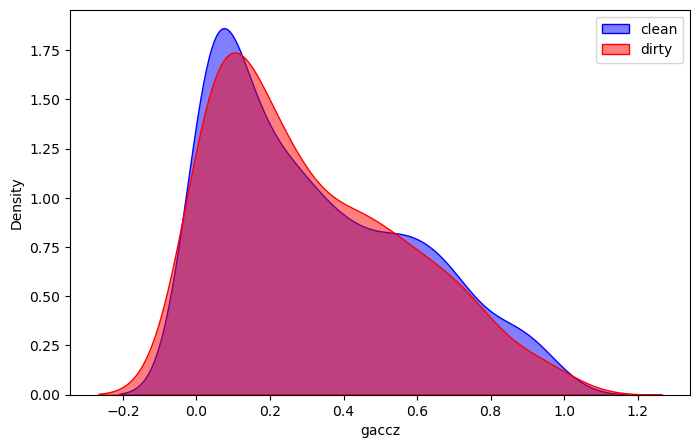

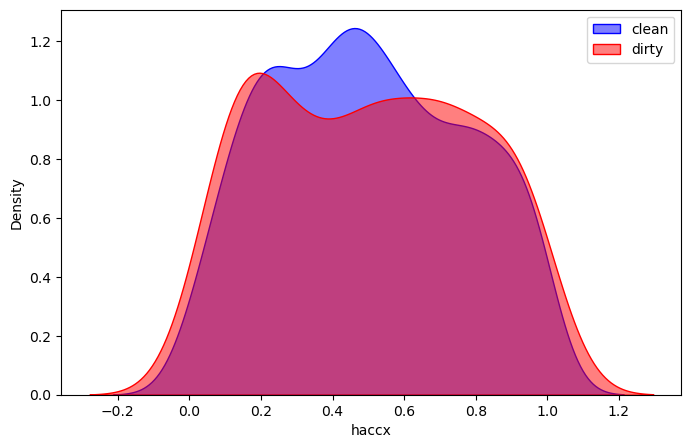

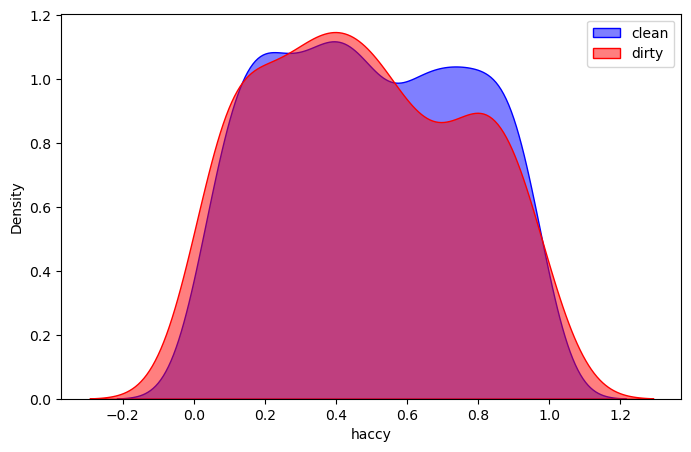

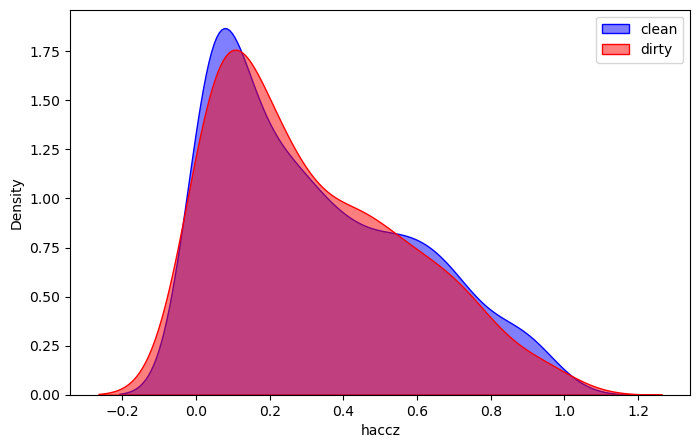

In [57]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(clean_radiator[col], label='clean', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(dirty_radiator[col], label='dirty', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [58]:
clean_exvalve = df1[df1['exvalve'] == 'Clean']
dirty_exvalve = df1[df1['exvalve'] == 'Dirty']

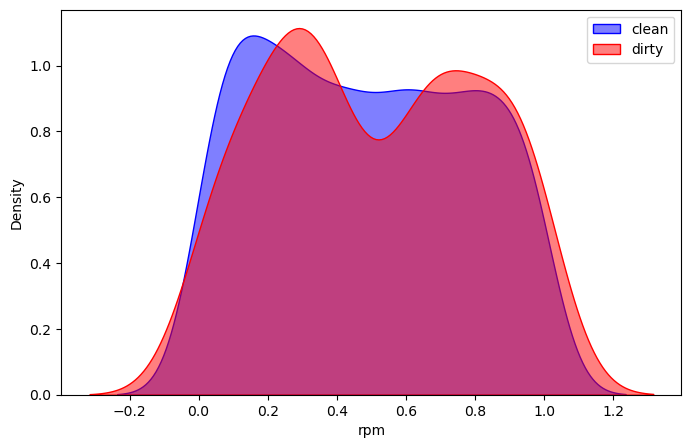

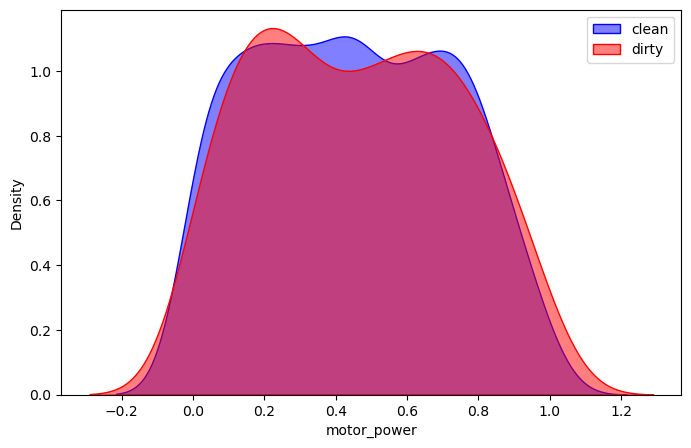

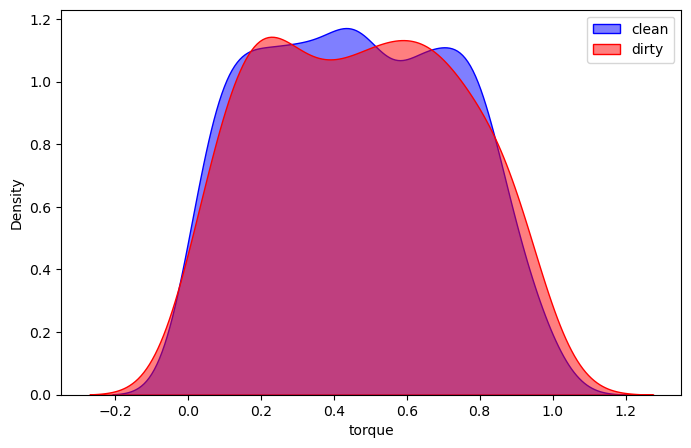

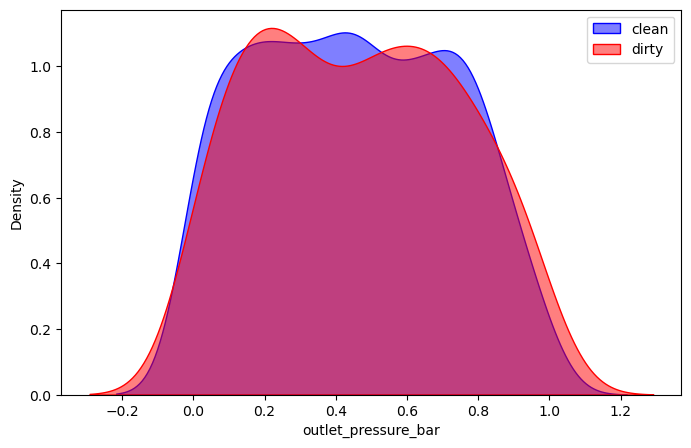

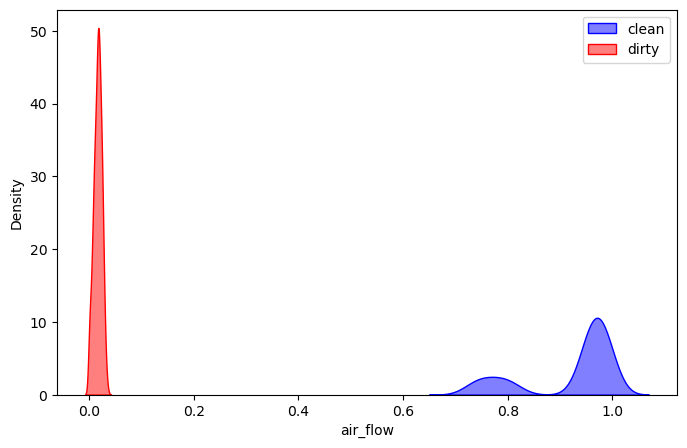

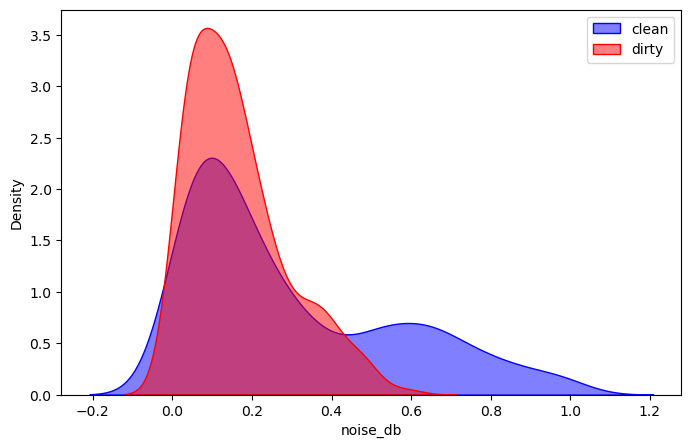

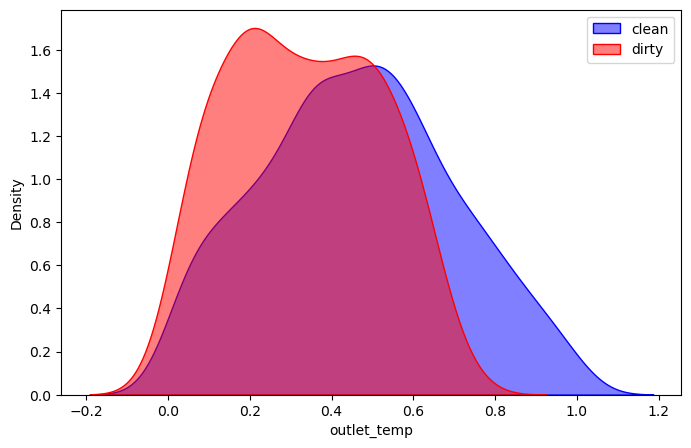

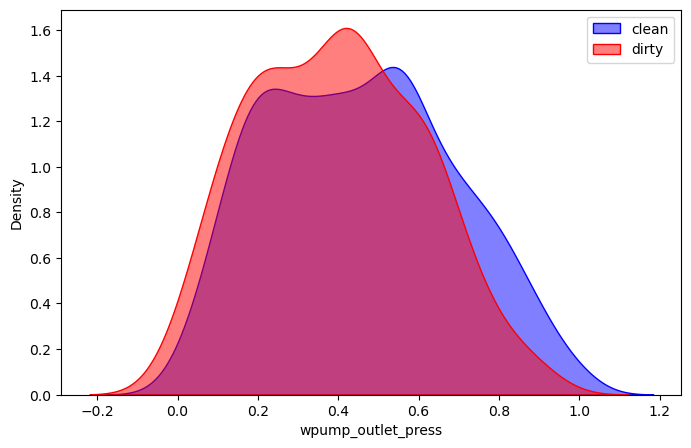

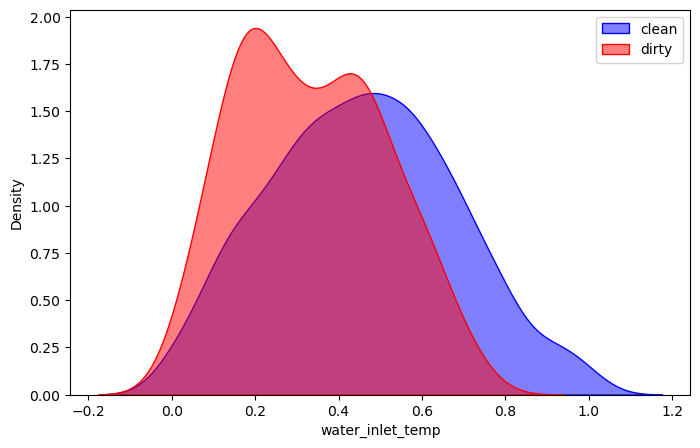

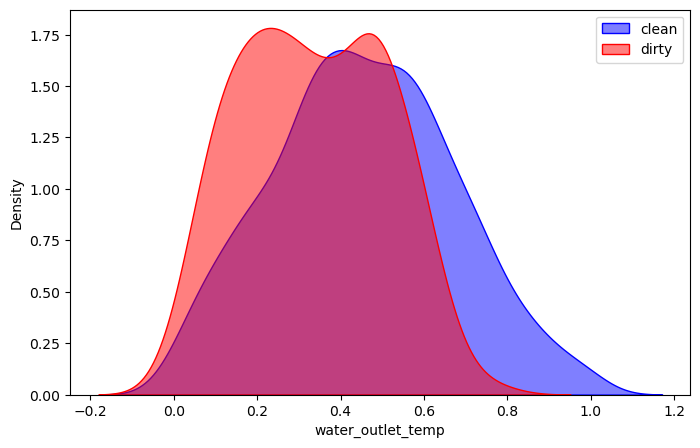

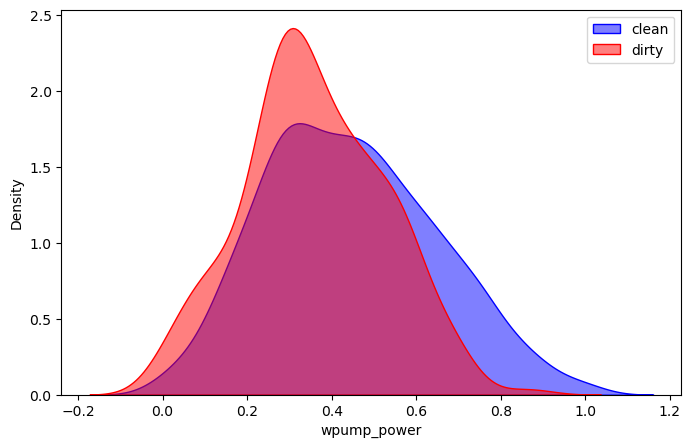

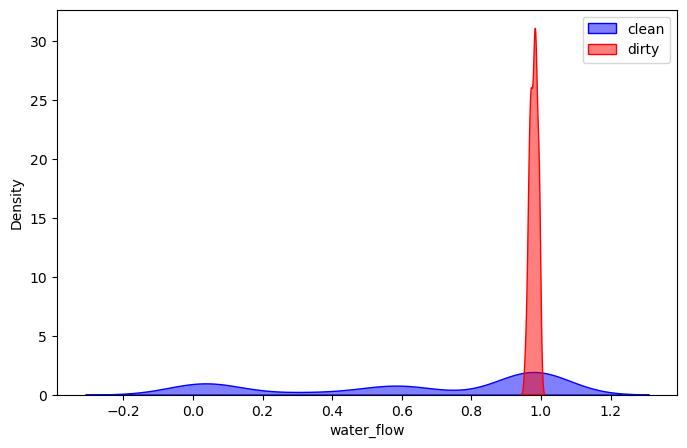

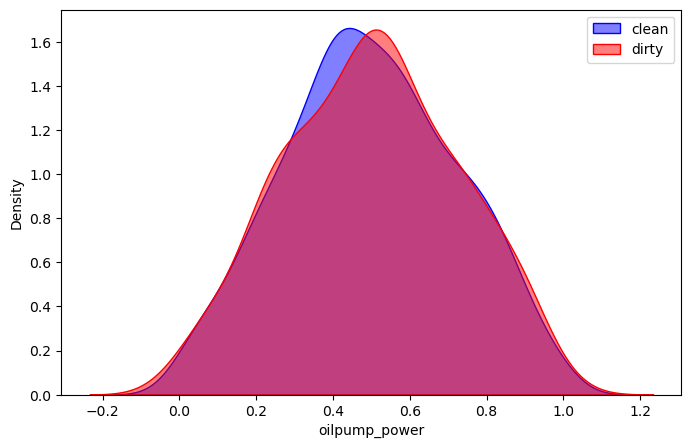

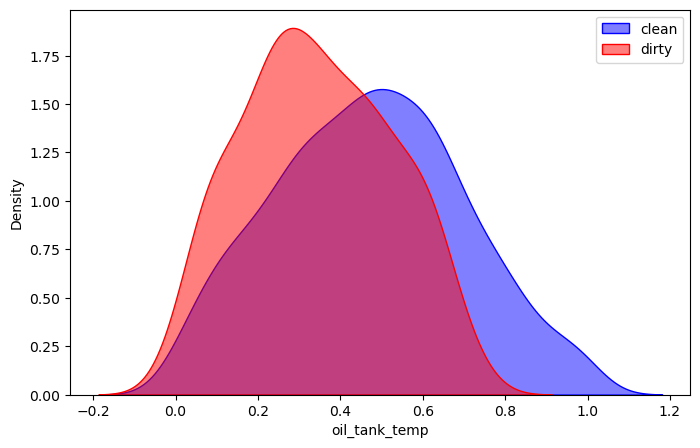

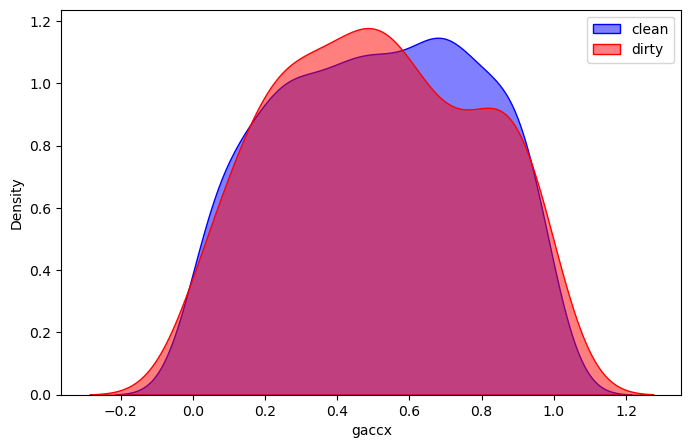

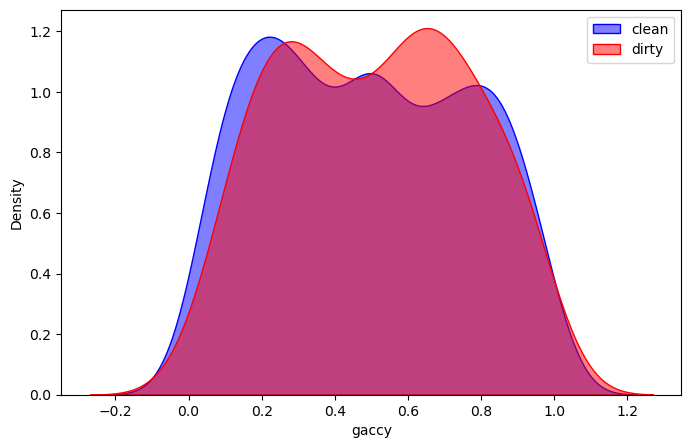

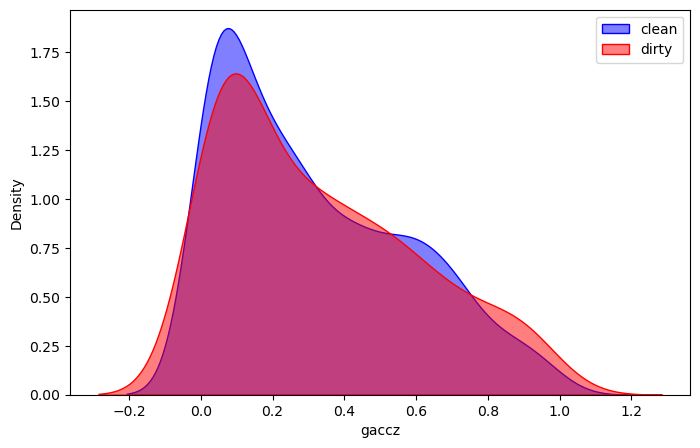

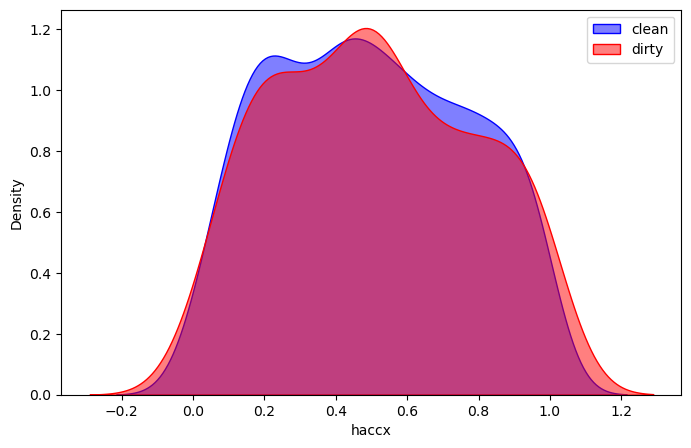

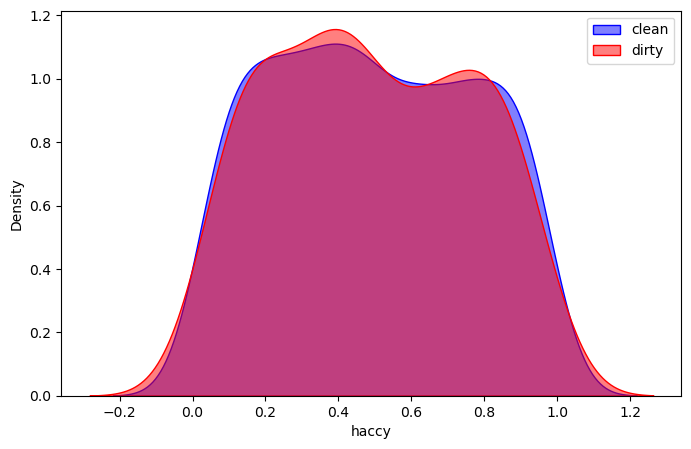

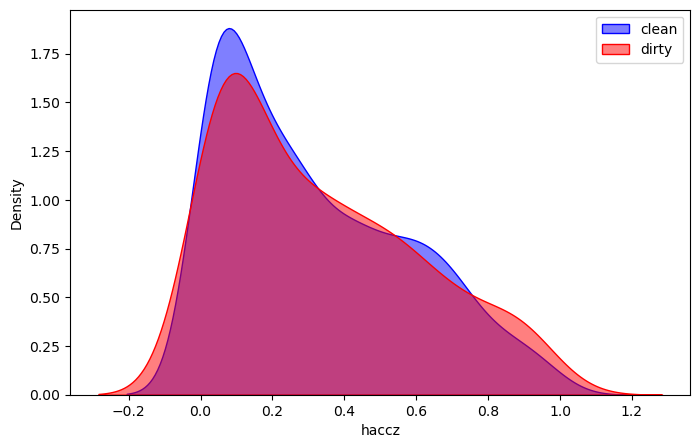

In [59]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(clean_exvalve[col], label='clean', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(dirty_exvalve[col], label='dirty', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [60]:
ok_wpump = df1[df1['wpump'] == 'Ok']
noisy_wpump = df1[df1['wpump'] == 'Noisy']

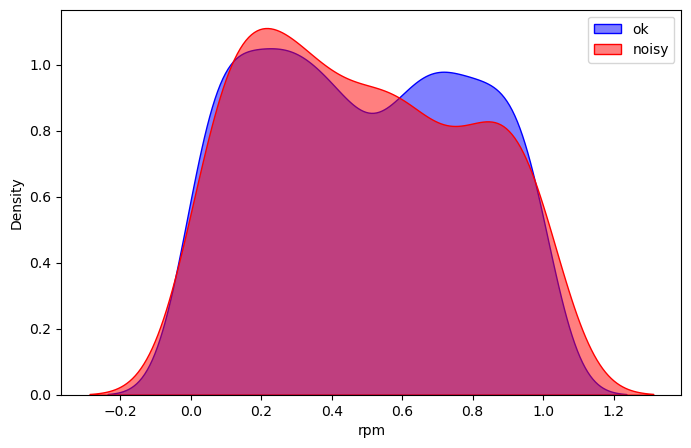

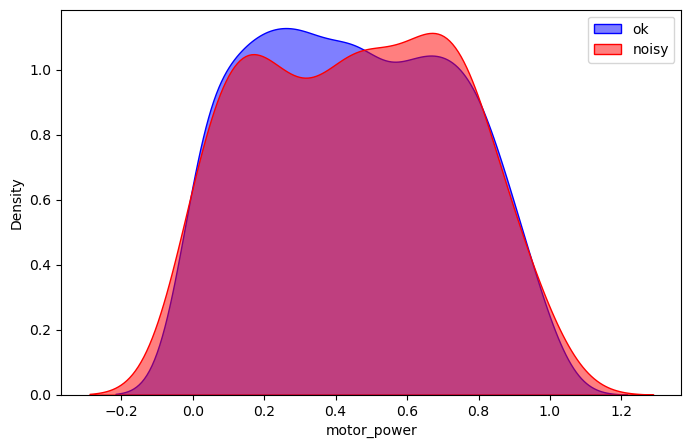

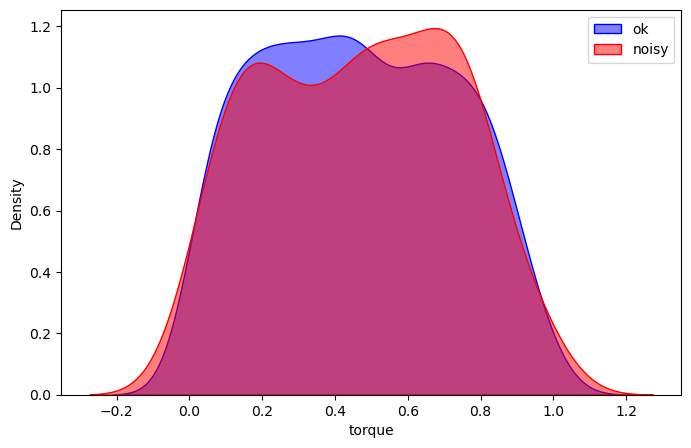

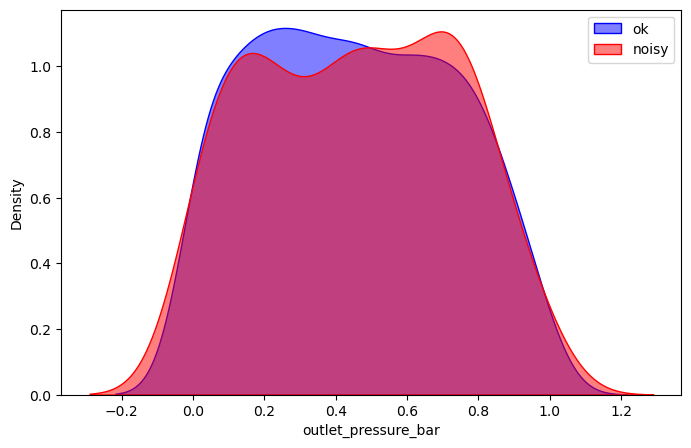

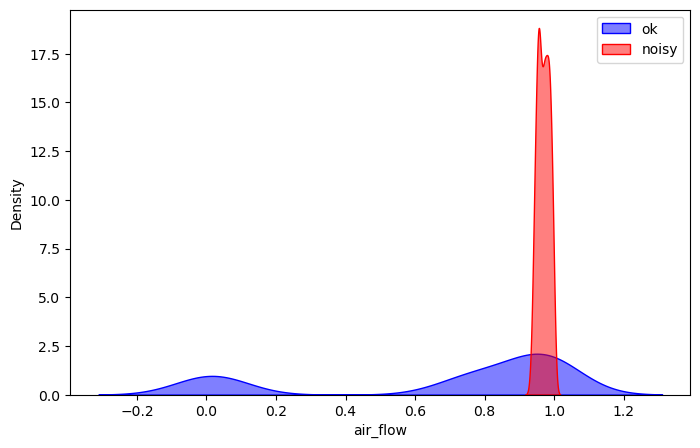

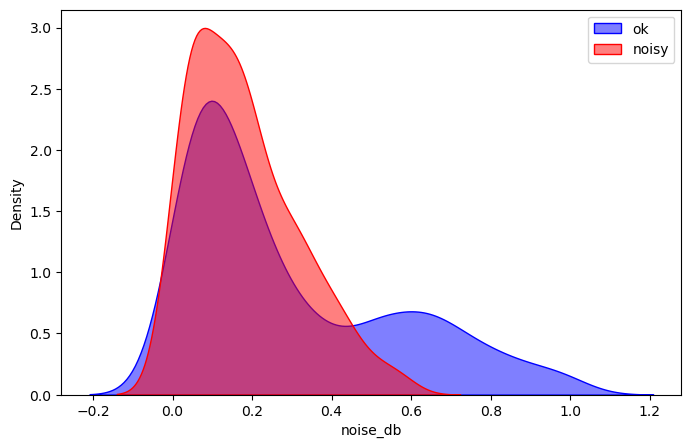

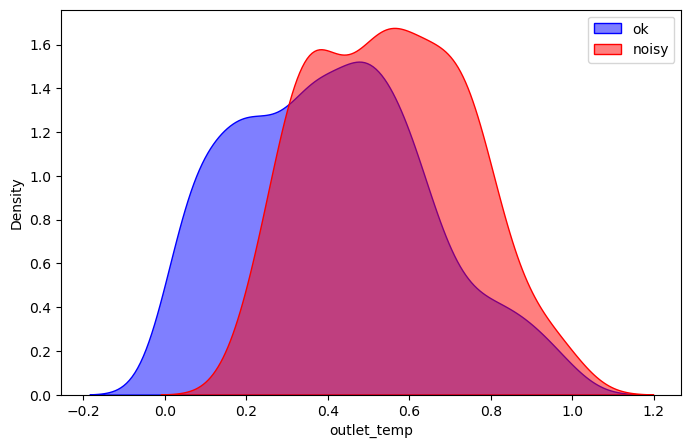

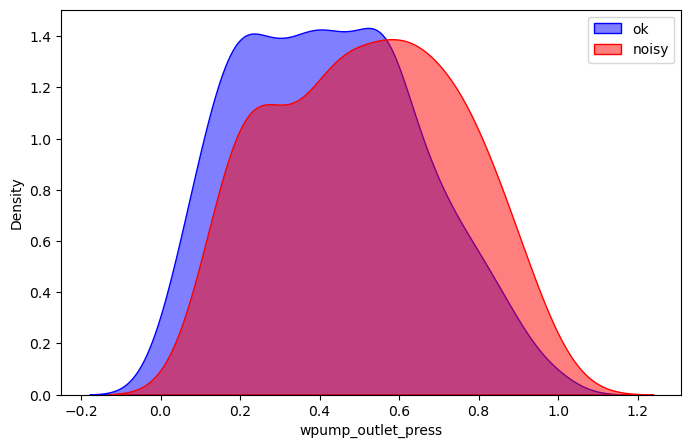

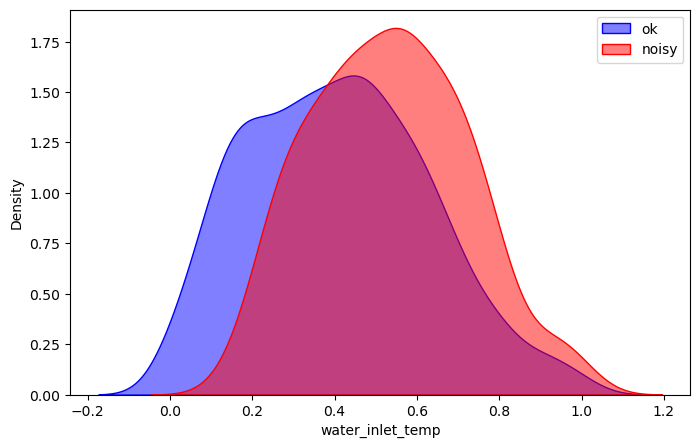

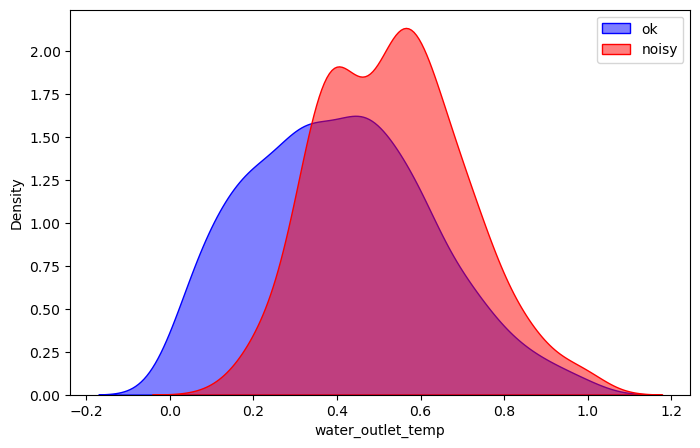

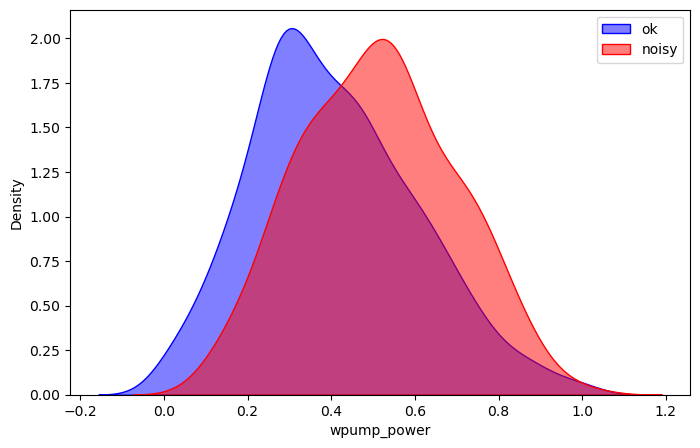

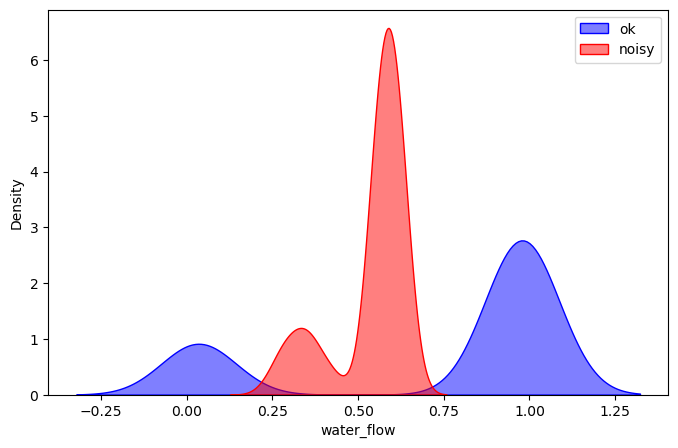

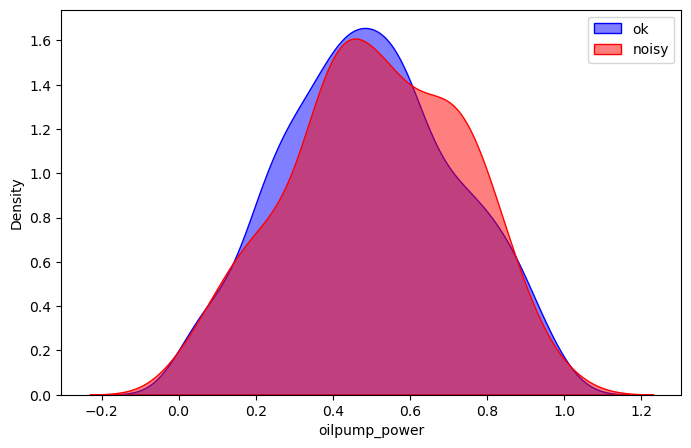

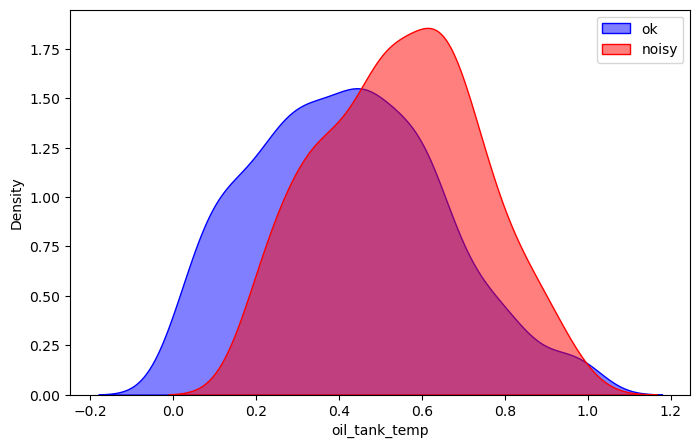

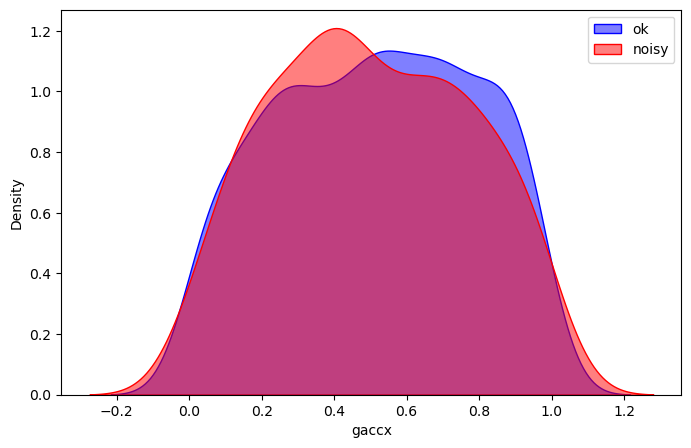

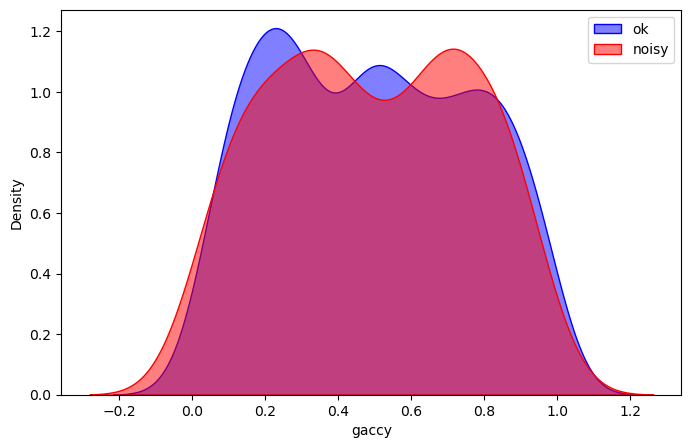

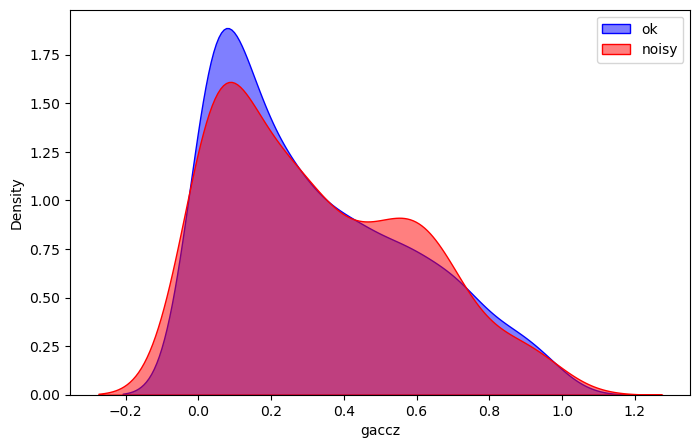

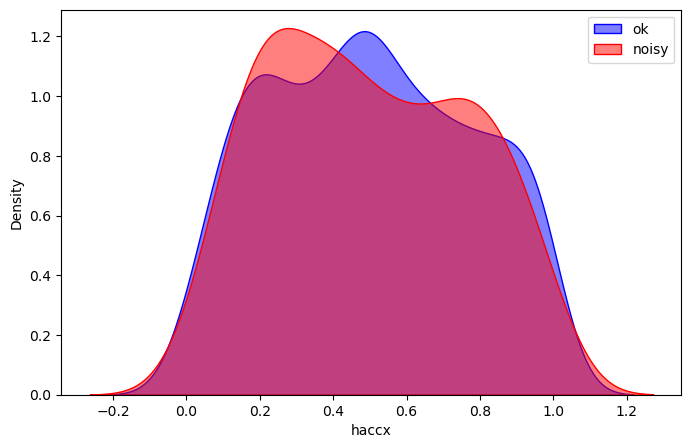

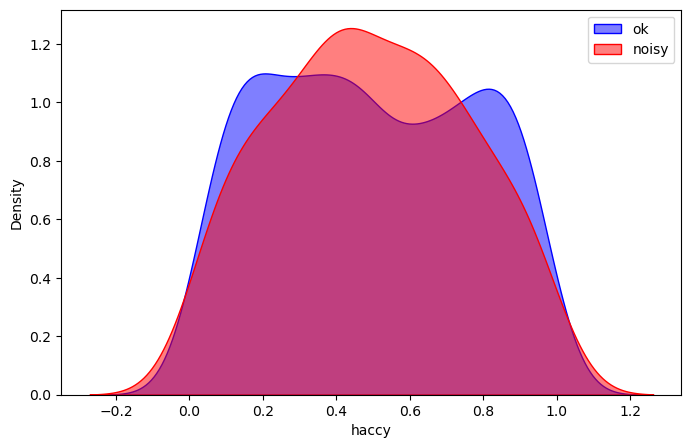

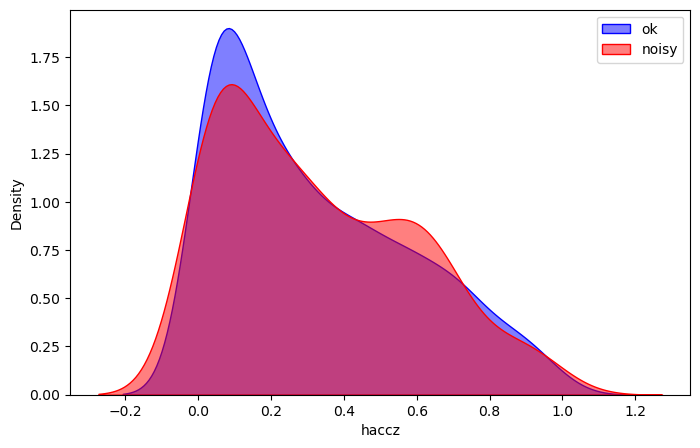

In [61]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(ok_wpump[col], label='ok', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(noisy_wpump[col], label='noisy', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [62]:
ok_bearings = df1[df1['bearings'] == 'Ok']
noisy_bearings = df1[df1['bearings'] == 'Noisy']

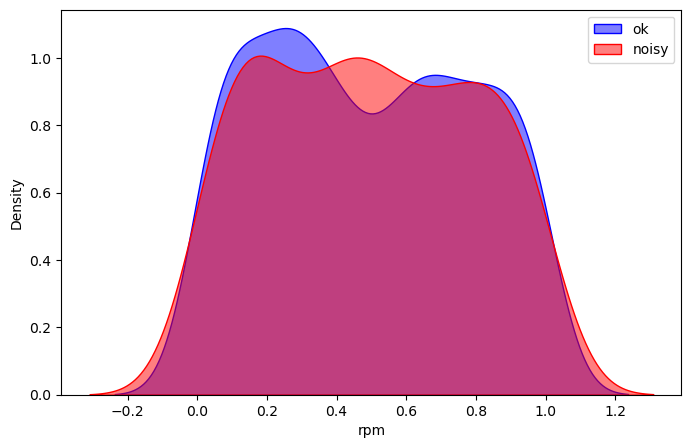

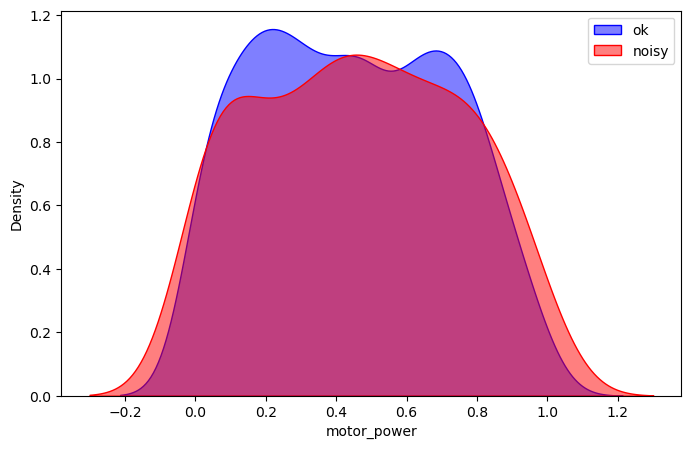

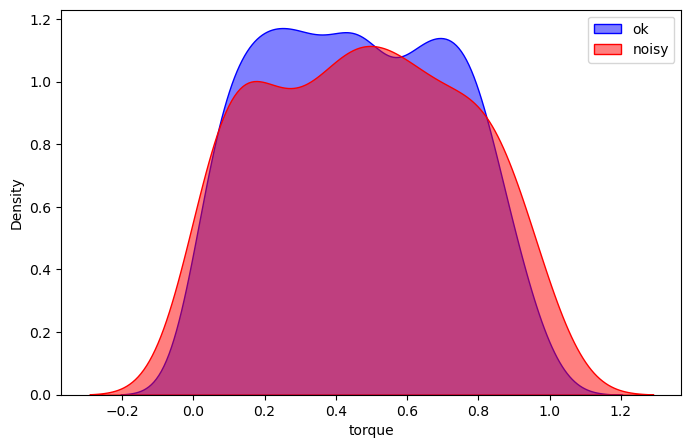

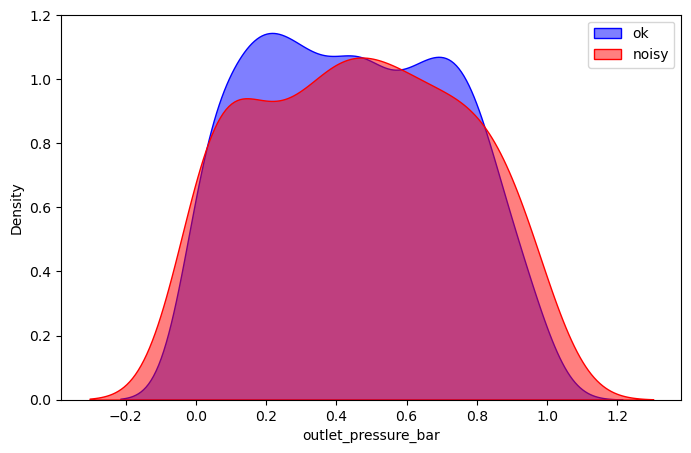

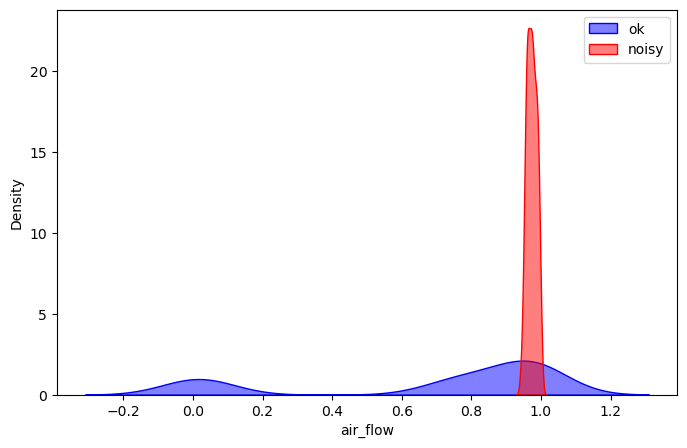

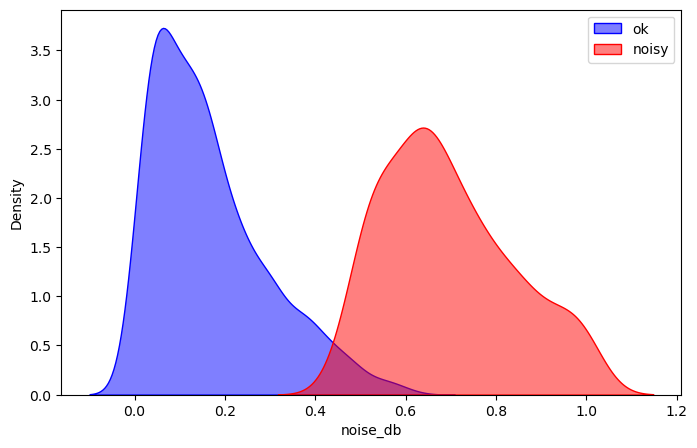

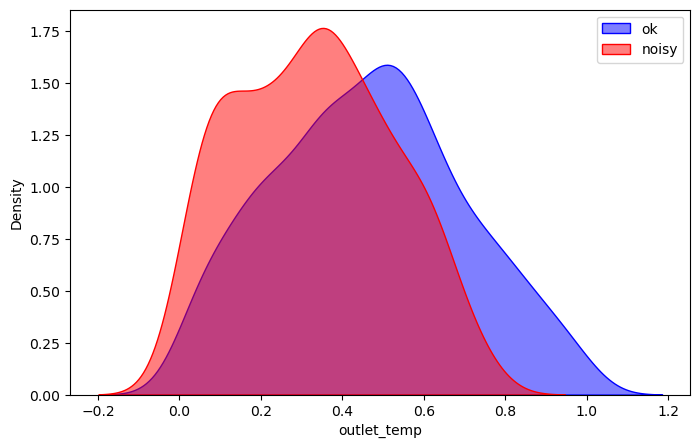

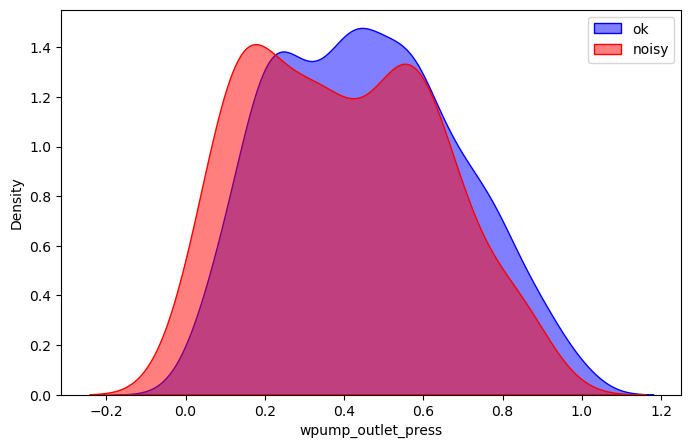

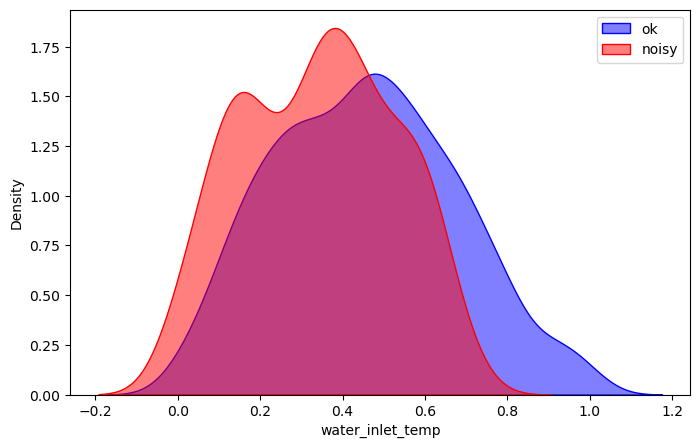

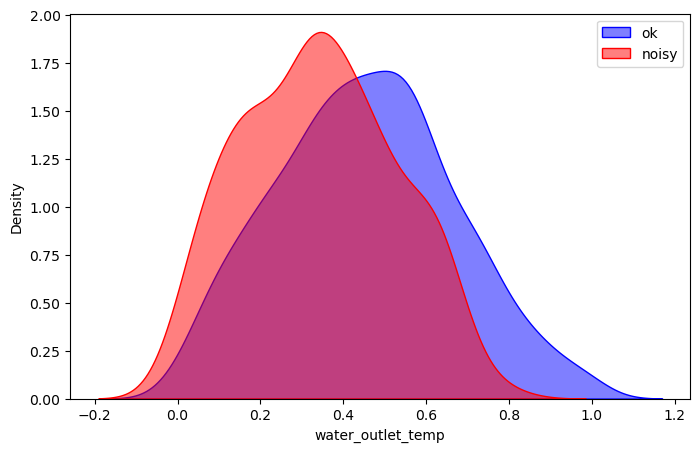

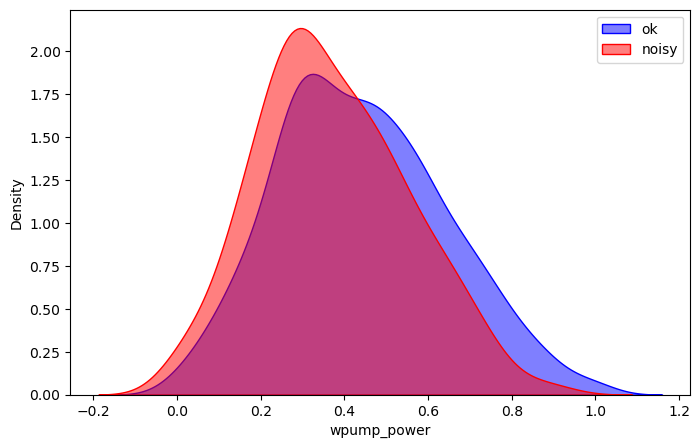

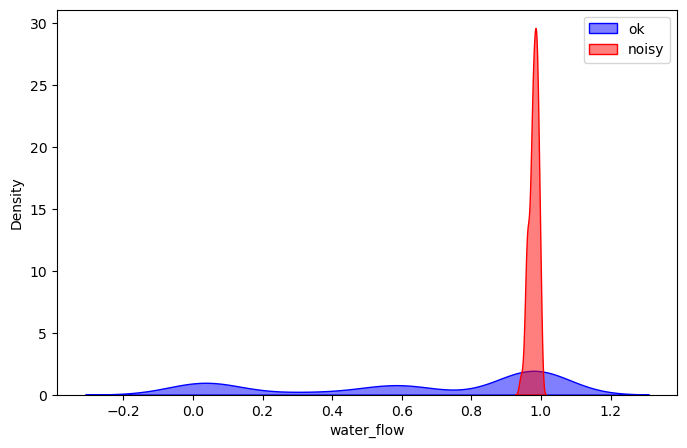

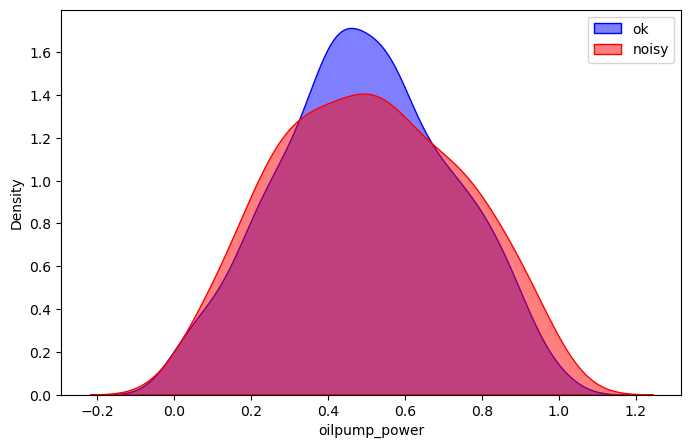

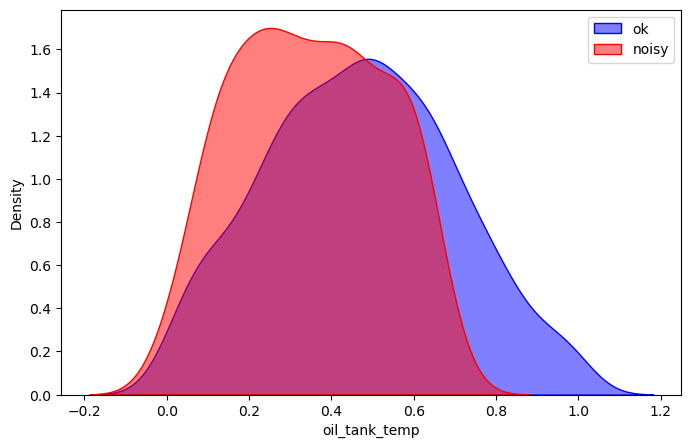

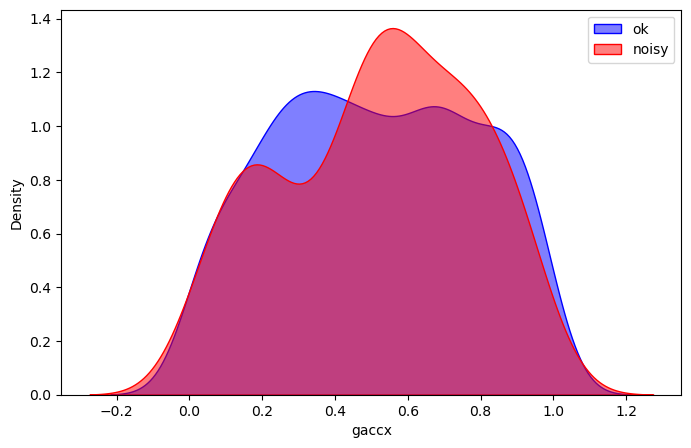

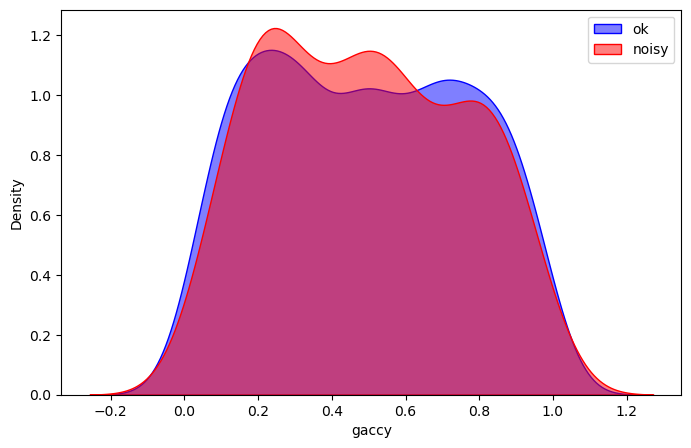

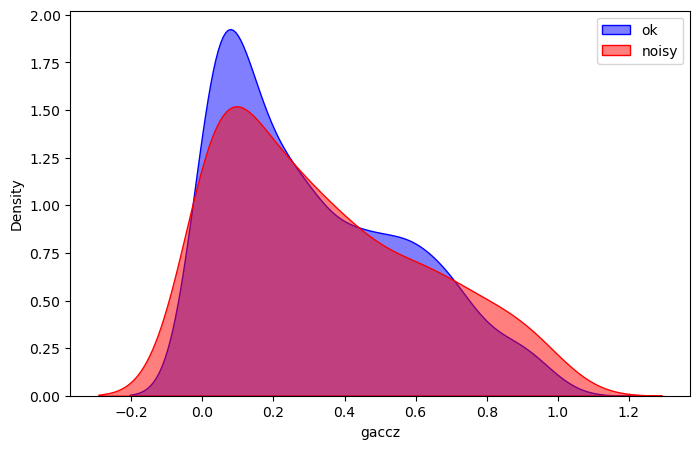

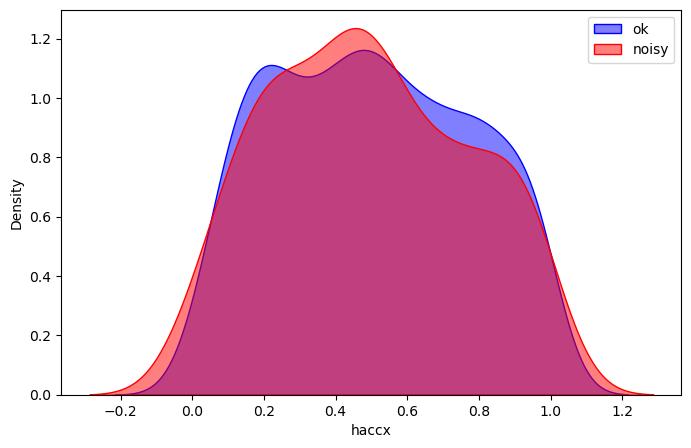

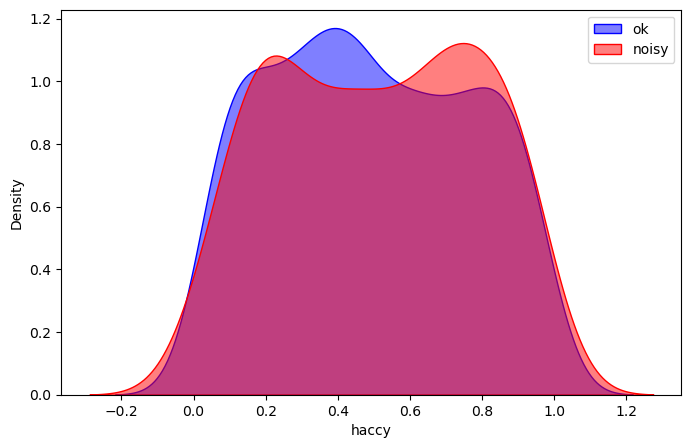

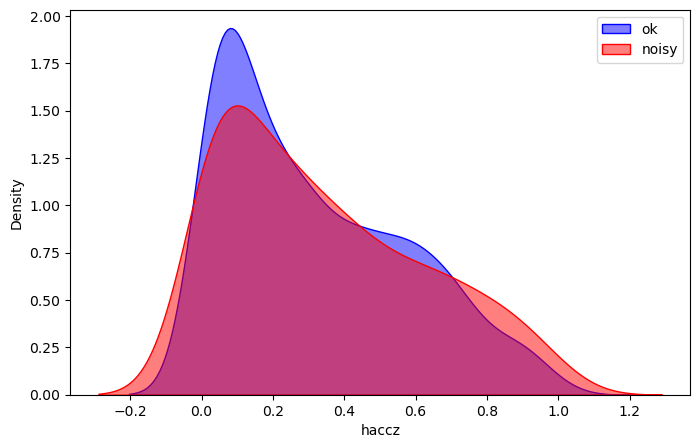

In [63]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(ok_bearings[col], label='ok', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(noisy_bearings[col], label='noisy', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [64]:
df1.head()

rpm  motor_power    torque  outlet_pressure_bar  air_flow  noise_db  \
0  0.475     0.001037  0.013344             0.000000  1.000000  0.094399   
1  0.825     0.016673  0.065919             0.012448  0.997860  0.059419   
2  0.375     0.054568  0.102597             0.056708  0.995721  0.102062   
3  0.000     0.094082  0.146078             0.106193  0.993834  0.056152   
4  0.450     0.110337  0.173792             0.112341  0.993162  0.133005   

   outlet_temp  wpump_outlet_press  water_inlet_temp  water_outlet_temp  ...  \
0     0.032137            0.781025          0.000000           0.000000  ...   
1     0.000000            0.487007          0.079204           0.120984  ...   
2     0.012533            0.192989          0.116465           0.050572  ...   
3     0.061420            0.175473          0.070570           0.178321  ...   
4     0.043337            0.349796          0.139066           0.105729  ...   

      gaccz     haccx     haccy     haccz  bearings  wpump  radiator  exvalve  \
0  0.007141  0.594658  0.518492  0.009264        Ok     Ok     Clean    Clean   
1  0.010637  0.516156  0.242284  0.000668        Ok     Ok     Clean    Clean   
2  0.028913  0.514346  0.191371  0.019640        Ok     Ok     Clean    Clean   
3  0.047450  0.591095  0.829934  0.056453        Ok     Ok     Clean    Clean   
4  0.042710  0.473300  0.481610  0.043482        Ok     Ok     Clean    Clean   

      diagnostic  Machine_Model  
0  Sans problème              2  
1  Sans problème              2  
2  Sans problème              2  
3  Sans problème              2  
4  Sans problème              2  

[5 rows x 26 columns]

### Analyse plus détaillé

#### Analyse features/features

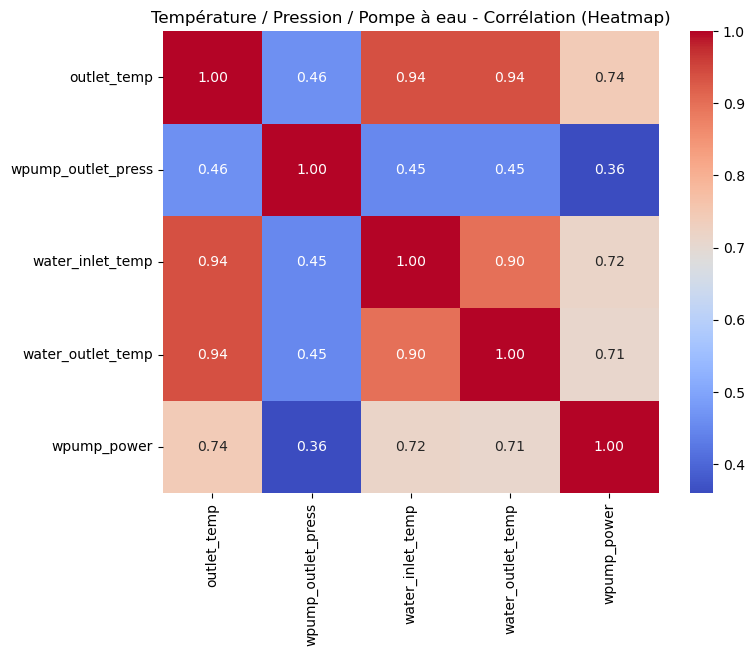

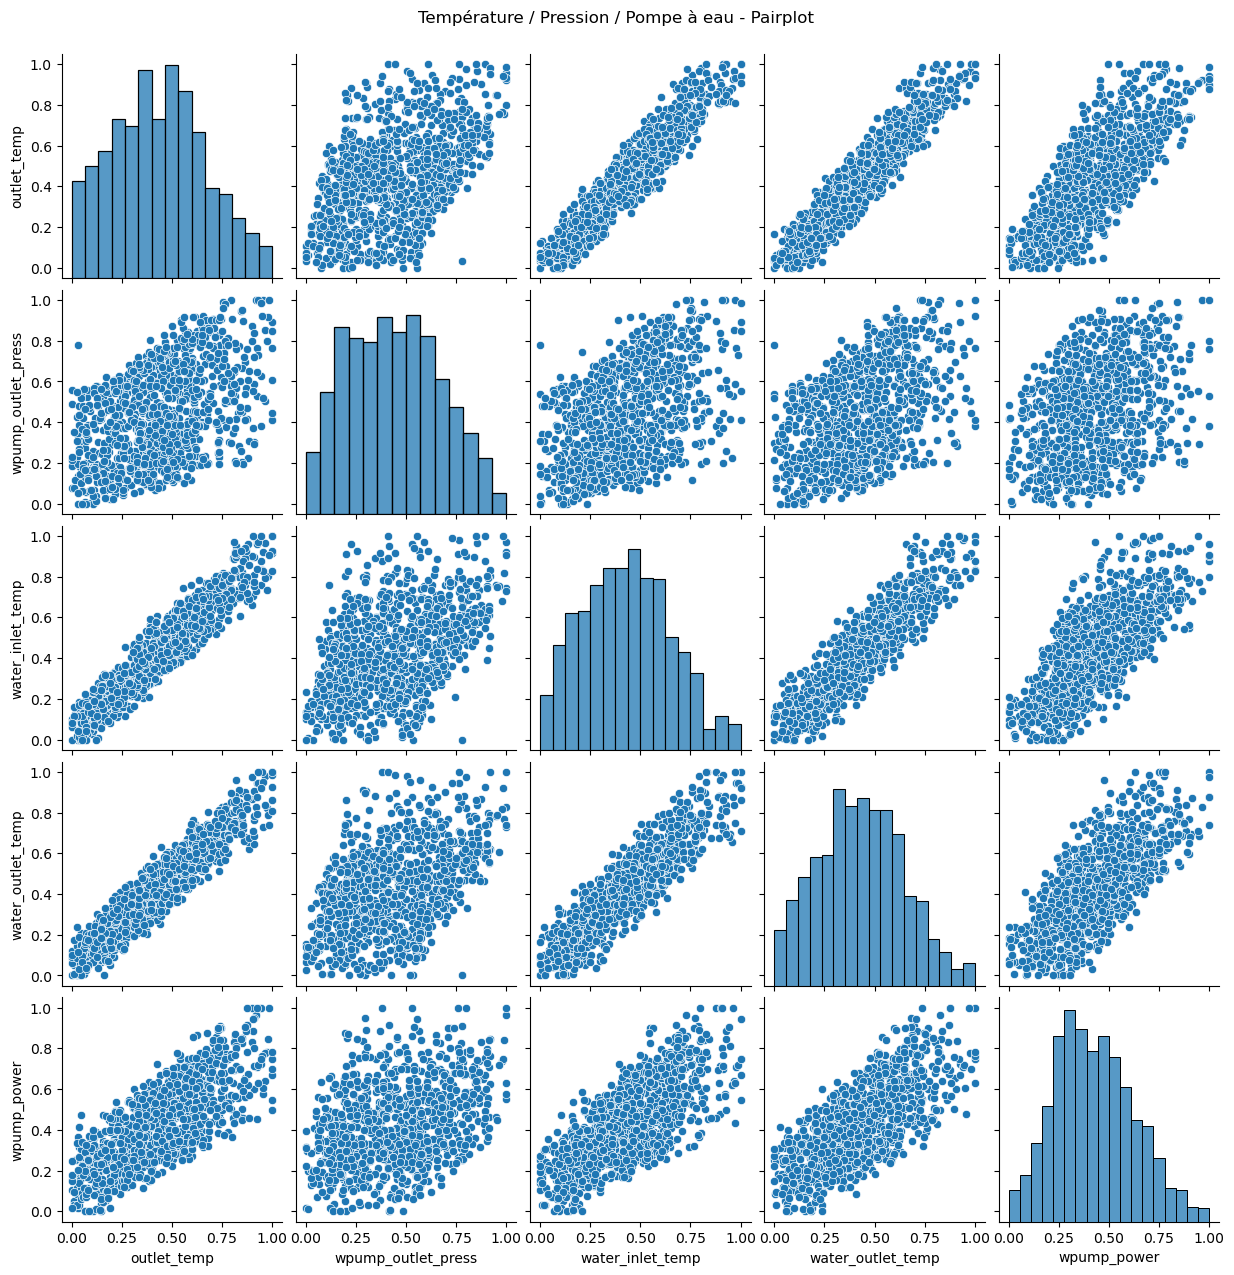

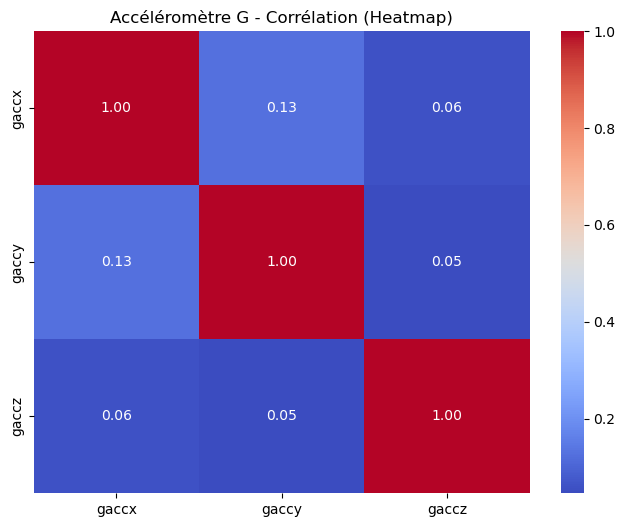

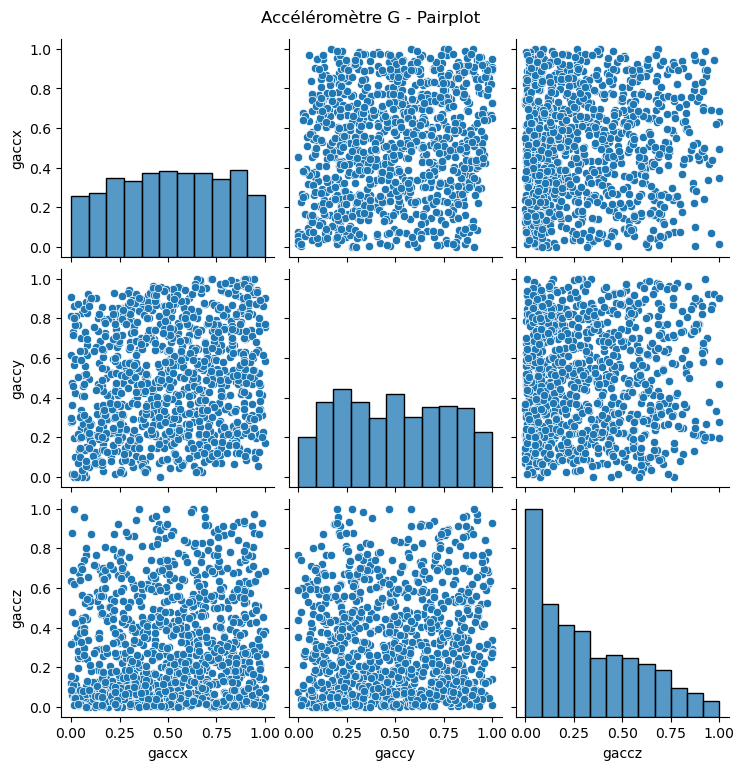

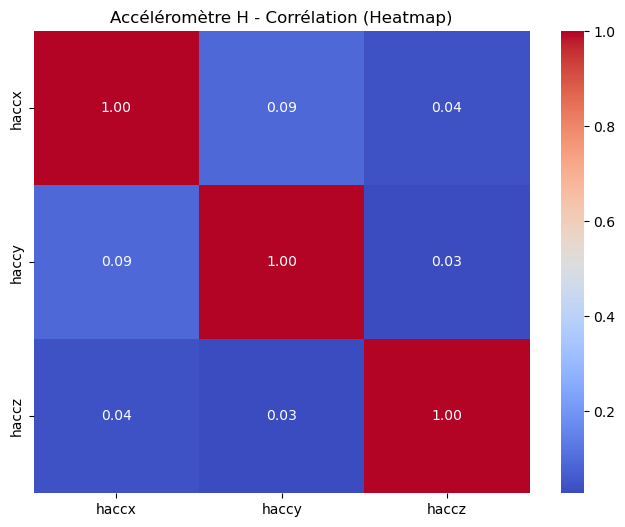

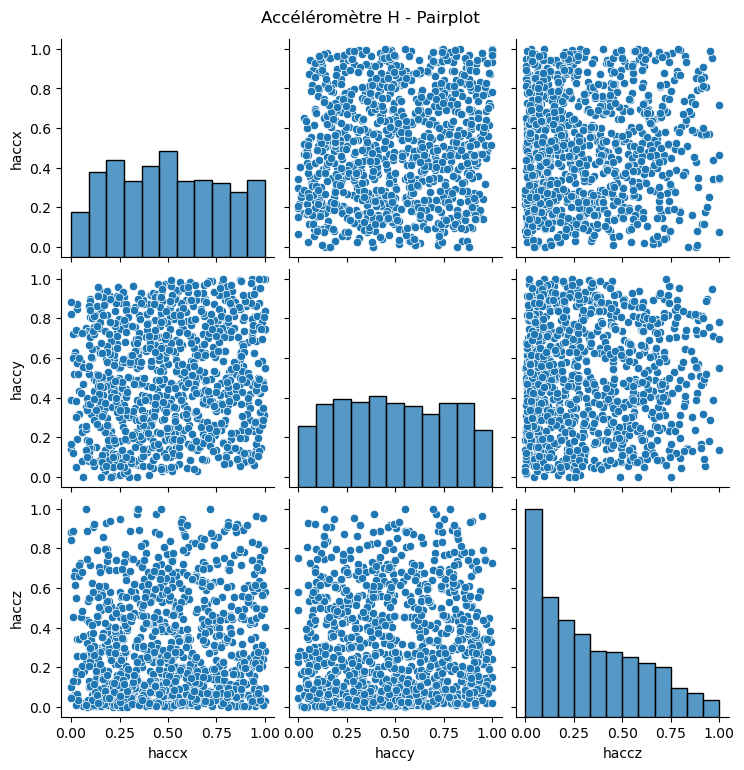

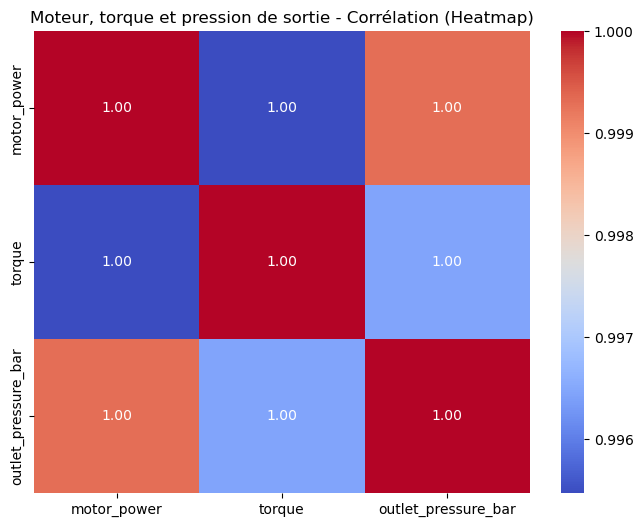

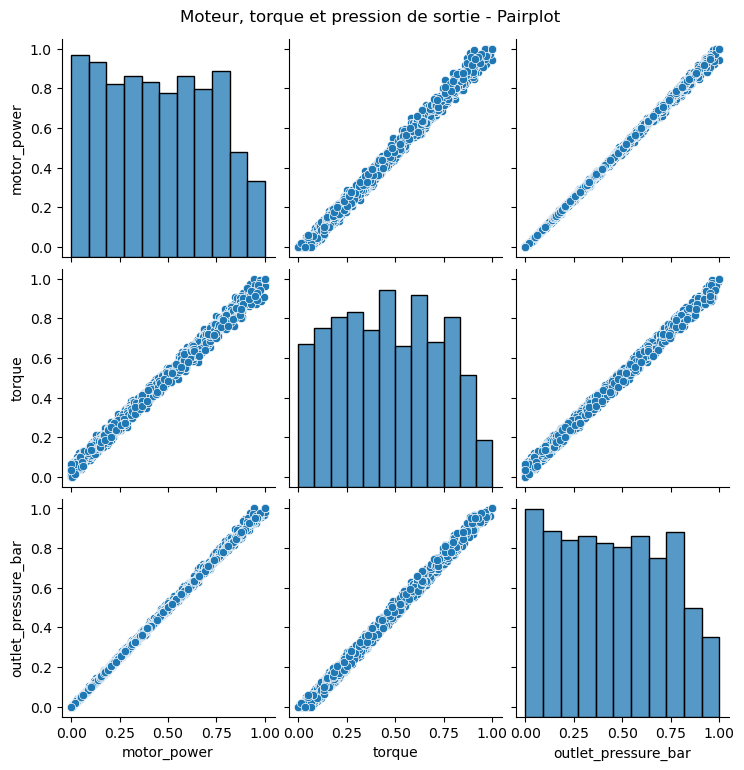

In [67]:
# === Sous-ensembles définis ===

# 1. Température, pression et puissance de la pompe à eau
subset_temp = ['outlet_temp', 'wpump_outlet_press', 'water_inlet_temp', 'water_outlet_temp', 'wpump_power']

# 2. Accéléromètre G (vibrations captées sur 3 axes)
subset_gacc = ['gaccx', 'gaccy', 'gaccz']

# 3. Accéléromètre H (autre capteur, 3 axes)
subset_hacc = ['haccx', 'haccy', 'haccz']

# 4. Moteur, torque et pression de sortie
subset_motor = ['motor_power','torque','outlet_pressure_bar']


# === Fonction d'analyse graphique ===

def plot_analysis(subset, title_prefix):
    subset_df = df1[subset]

    # Heatmap : montre les corrélations entre chaque paire de variables
    plt.figure(figsize=(8, 6))
    sns.heatmap(subset_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{title_prefix} - Corrélation (Heatmap)")
    plt.show()

    # Pairplot : scatterplots en 2D pour chaque paire, avec histogrammes
    sns.pairplot(subset_df)
    plt.suptitle(f"{title_prefix} - Pairplot", y=1.02)
    plt.show()


# === Lancer les visualisations pour chaque sous-ensemble ===

plot_analysis(subset_temp, "Température / Pression / Pompe à eau")
plot_analysis(subset_gacc, "Accéléromètre G")
plot_analysis(subset_hacc, "Accéléromètre H")
plot_analysis(subset_motor, "Moteur, torque et pression de sortie")


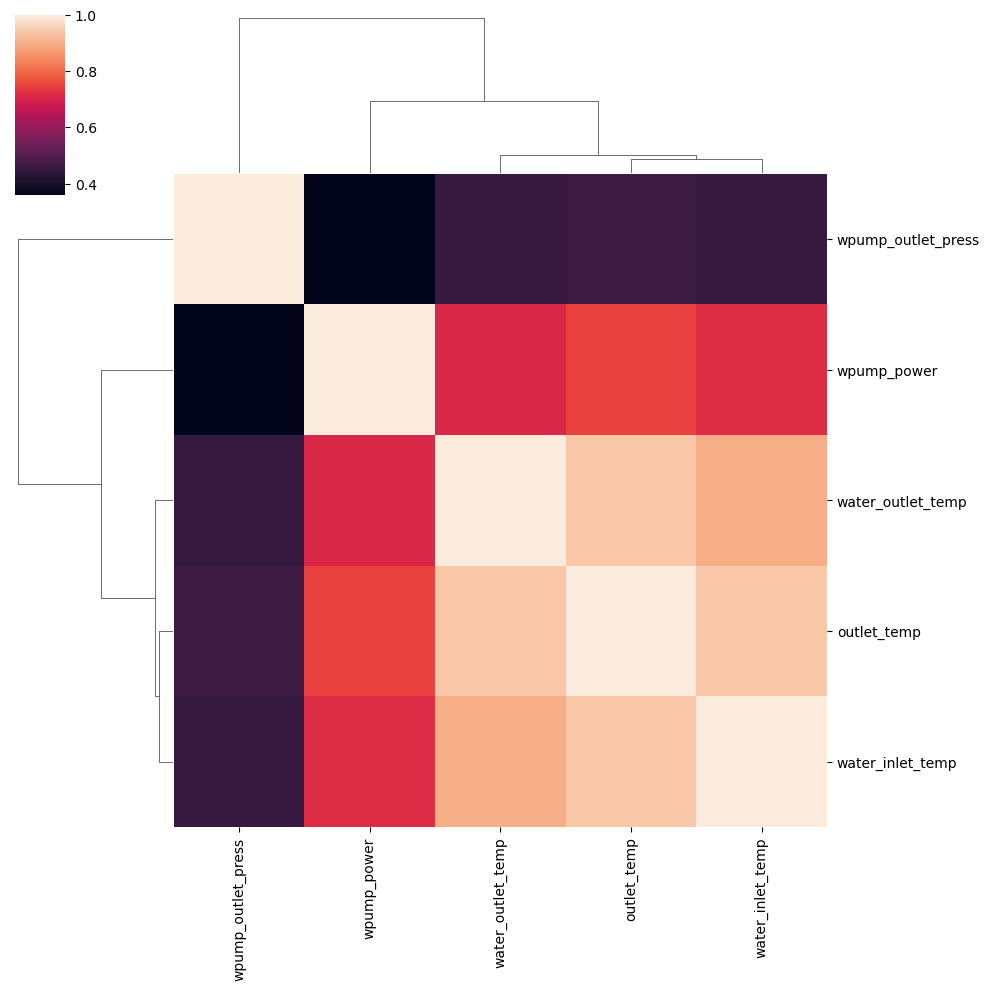

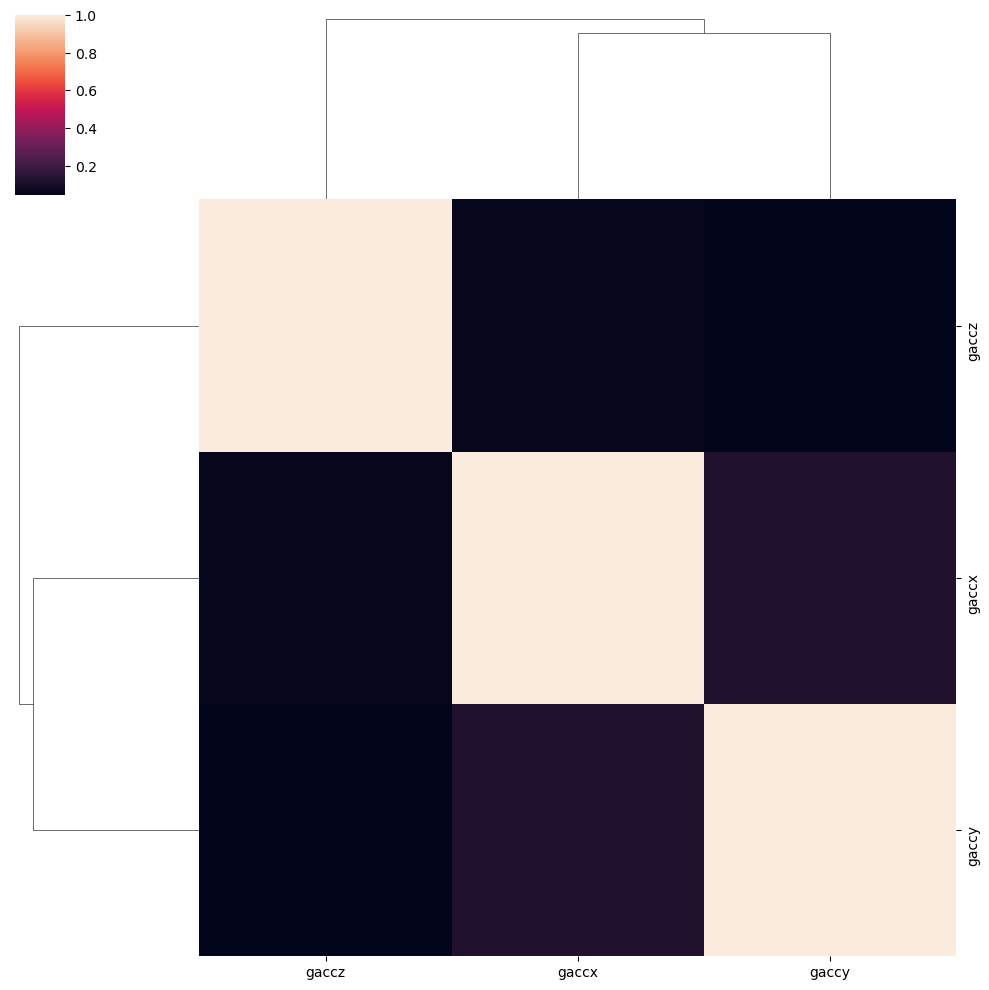

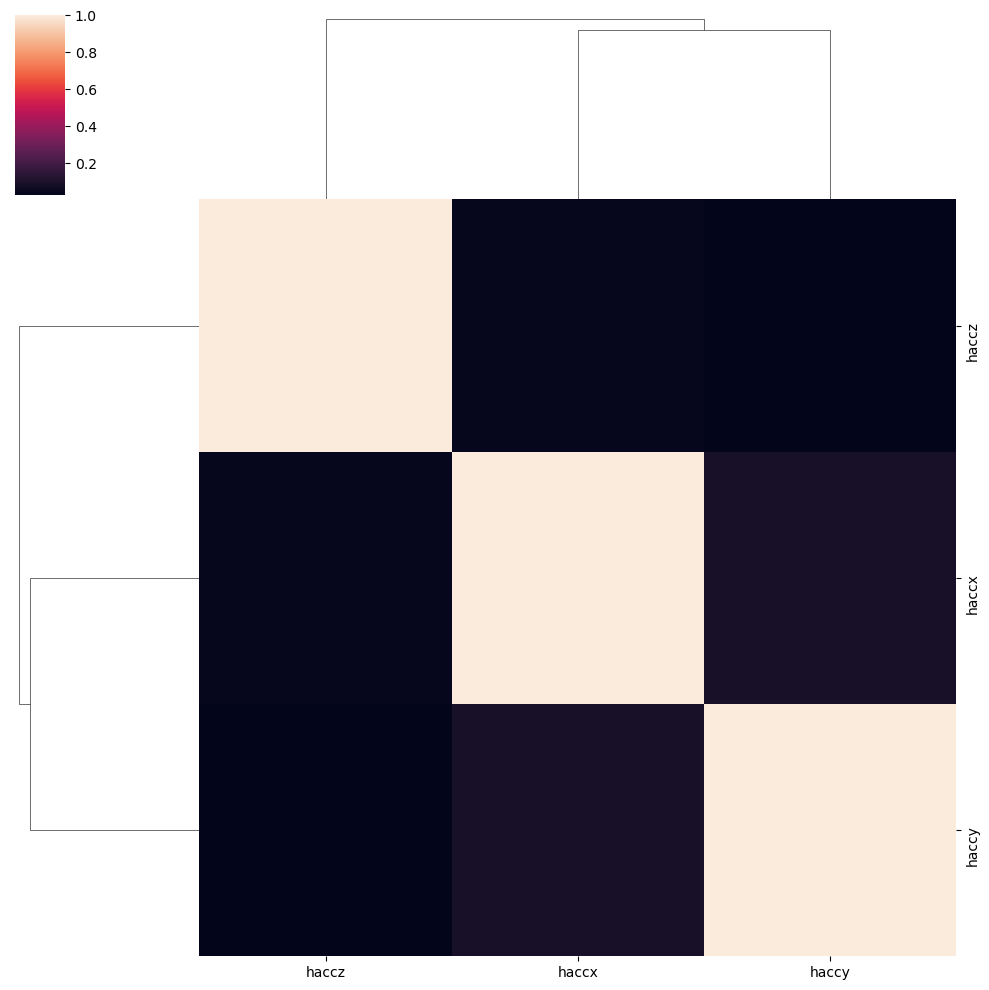

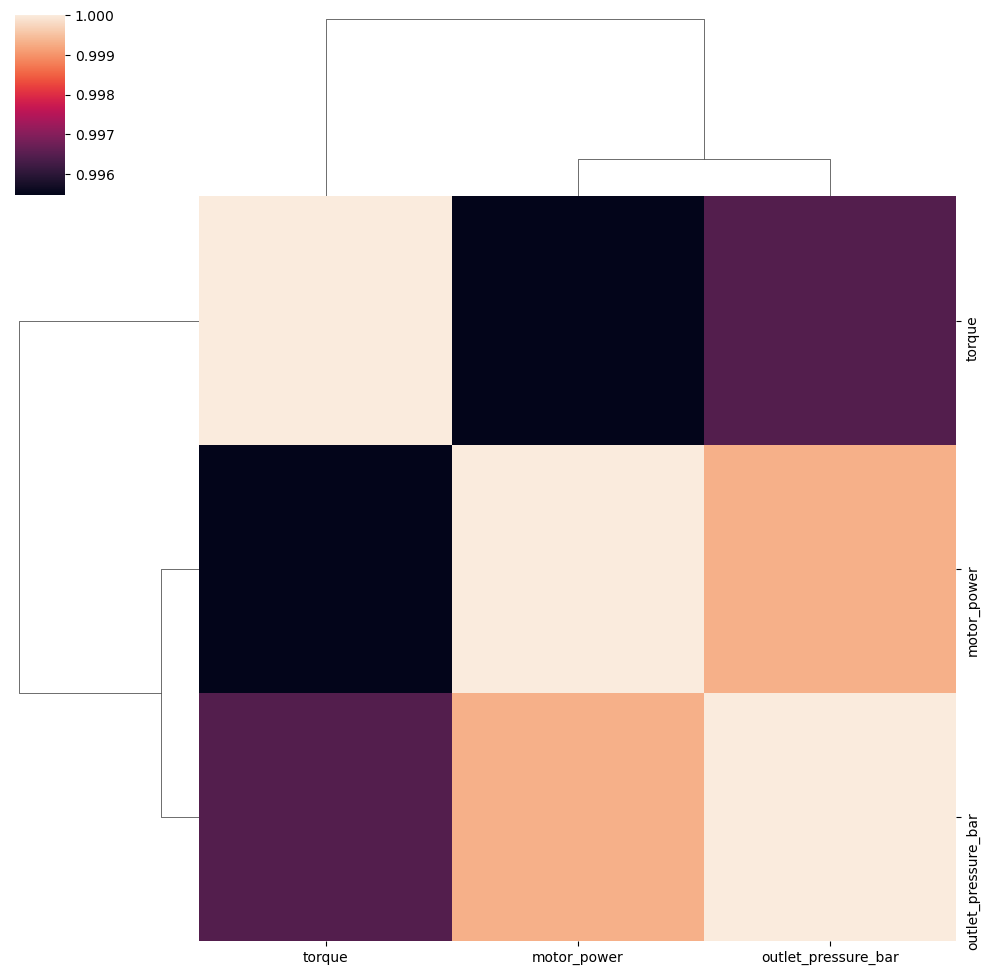

In [68]:
sns.clustermap(df1[subset_temp].corr())
sns.clustermap(df1[subset_gacc].corr())
sns.clustermap(df1[subset_hacc].corr())
sns.clustermap(df1[subset_motor].corr())

#### Hypothèse nulle

In [70]:
from scipy.stats import ttest_ind

In [71]:
clean_radiator_df = df1[df1['radiator'] == 'Clean']
dirty_radiator_df = df1[df1['radiator'] == 'Dirty']
clean_exvalve_df = df1[df1['exvalve'] == 'Clean']
dirty_exvalve_df = df1[df1['exvalve'] == 'Dirty']
ok_wpump_df = df1[df1['wpump'] == 'Ok']
noisy_wpump_df = df1[df1['wpump'] == 'Noisy']
ok_bearings_df = df1[df1['bearings'] == 'Ok']
noisy_bearings_df = df1[df1['bearings'] == 'Noisy']

In [73]:
print(clean_radiator_df.shape)
print(dirty_radiator_df.shape)
print(clean_exvalve_df.shape)
print(dirty_exvalve_df.shape)
print(ok_wpump_df.shape)
print(noisy_wpump_df.shape)
print(ok_bearings_df.shape)
print(noisy_bearings_df.shape)

(800, 26)
(200, 26)
(800, 26)
(200, 26)
(800, 26)
(200, 26)
(800, 26)
(200, 26)
